# **TUGAS MINGGU 1**

NAMA  : REYHAN VITO IDHAM PRATAMA

NIM   : A11.2020.12981

Tugas Minggu 1 berupa link GitHub yang berisi repository codingan dari dataset
hungarian.data Tugas Minggu 1 yang akan di-submit oleh mahasiswa Bimbingan Karir -
Data Science diharapkan sesuai dengan ketentuan berikut:
1. Tugas Minggu 1 wajib sampai ke tahap cleaning data (jika lebih dari tahap tersebut
lebih baik)
2. Ketentuan dalam source code Tugas Minggu 1 harus ada beberapa point berikut :
  
  1) Pengumpulan data

  2) Menelaah data

  3) Memvalidasi data

  4) Menentukan objek data

  5) Membersihkan data
3. Berikan keterangan atau penjelasan dengan bahasa masing-masing di setiap point /
step dalam source codenya.


## **1. PENGUMPULAN DATA**

Dataset diperoleh dari UC Irvine Machine Learning Repository dengan fokus pada diagnosis penyakit jantung. (https://archive.ics.uci.edu/dataset/45/heart+disease)

Direktori ini berisi empat basis data yang berkaitan dengan diagnosis penyakit jantung. Semua atribut bersifat numerik. Data ini dikumpulkan dari empat lokasi berikut:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Setiap basis data memiliki format instan yang sama. Meskipun basis data memiliki 76 atribut raw, hanya 14 di antaranya yang benar-benar digunakan. Oleh karena itu, telah dibuat 2 salinan dari setiap basis data: satu dengan semua atribut dan satu dengan 14 atribut yang sebenarnya digunakan dalam eksperimen sebelumnya.

Para penulis basis data ini meminta:

"...bahwa setiap publikasi yang muncul dari penggunaan data ini mencantumkan nama peneliti utama yang bertanggung jawab atas pengumpulan data di setiap lembaga. Mereka adalah:

       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:
	  Robert Detrano, M.D., Ph.D.

Penting untuk dicatat bahwa dataset yang digunakan dalam tugas ini berasal dari Hungarian Institute of Cardiology dan secara khusus disebut sebagai **"hungarian.data".**

## **2. MENELAAH DATA**


### *IMPORT LIBRARY*

In [ ]:
# Import library pandas dengan alias 'pd' untuk memudahkan penggunaan
import pandas as pd

# Import modul re (regular expression) untuk bekerja dengan ekspresi reguler
import re

# Import library numpy dengan alias 'np' untuk operasi numerik efisien
import numpy as np

# Import modul itertools untuk membuat dan mengelola iterator
import itertools


### *LOAD DATA MOUNTING DRIVE*

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Menetapkan string path file ke variabel 'directory'
directory = '/content/gdrive/MyDrive/Heart_BK/hungarian.data'

# Menampilkan isi dari variabel 'directory' (dalam konteks ini, path file)
directory

'/content/gdrive/MyDrive/Heart_BK/hungarian.data'

In [ ]:
# Membuka file dengan path yang telah ditetapkan ke variabel 'directory'
with open(directory, encoding='Latin1') as file:
    # Membaca setiap baris dari file, membersihkan trailing whitespaces, dan menyimpannya dalam list 'lines'
    lines = [line.strip() for line in file]

# Menampilkan 10 baris pertama dari list 'lines'
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

***Trailing whitespaces*** merujuk pada spasi atau karakter kosong yang mungkin ada di ujung akhir **(akhir baris)** dari sebuah string. Mereka mungkin muncul secara tidak sengaja saat membuat atau menyimpan file teks. Meskipun seringkali tidak terlihat saat membaca teks, tetapi bisa menjadi masalah terutama saat memproses data, karena mereka dapat mempengaruhi kesesuaian atau perbandingan string.

***line.strip()*** digunakan untuk membersihkan setiap baris dari trailing whitespaces. ***Fungsi strip()*** menghapus spasi ekstra di awal dan akhir setiap baris. Ini membantu dalam membersihkan data sehingga tidak ada karakter tambahan yang tidak diinginkan yang dapat memengaruhi analisis atau pemrosesan selanjutnya.

### *MEMBUAT DATAFRAME PANDAS*



---


itertools.takewhile adalah fungsi yang mengambil elemen dari iterable selama kondisi tertentu terpenuhi.

Pada kasus ini, `***lambda x: len(x) == 76***` adalah kondisi yang menyatakan bahwa kita akan terus mengambil elemen selama panjang elemen (jumlah kolom) adalah 76.

*`' '.join(lines[i:(i+10)]).split()`* menggabungkan sepuluh baris menjadi satu string, lalu membaginya berdasarkan spasi. Ini dilakukan untuk menggabungkan setiap sepuluh baris menjadi satu string agar dapat diolah lebih lanjut.


`for i in range(0, len(lines), 10)` digunakan untuk mengambil setiap sepuluh baris dari lines.

In [ ]:
# Menggunakan itertools.takewhile untuk mengambil data dari lines
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))
)

# Membuat DataFrame pandas dari hasil data
df = pd.DataFrame.from_records(data)

# Menampilkan 5 baris pertama dari DataFrame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


### *MENGHAPUS KOLOM PERTAMA*

In [ ]:
# Menghapus kolom terakhir dari DataFrame df
df = df.iloc[:, :-1]


### *MENGHAPUS KOLOM TERAKHIR*

In [ ]:
# Menghapus kolom pertama dari DataFrame df menggunakan drop
df = df.drop(df.columns[0], axis=1)

# Menampilkan beberapa baris pertama DataFrame setelah penghapusan
print(df.head())

  1   2  3  4  5  6   7  8    9  10  ...  65  66  67 68 69 70 71 72   73   74
0  0  40  1  1  0  0  -9  2  140  0  ...  -9  -9  -9  1  1  1  1  1  -9.  -9.
1  0  49  0  1  0  0  -9  3  160  1  ...  -9  -9  -9  1  1  1  1  1  -9.  -9.
2  0  37  1  1  0  0  -9  2  130  0  ...  -9  -9  -9  1  1  1  1  1  -9.  -9.
3  0  48  0  1  1  1  -9  4  138  0  ...  -9   2  -9  1  1  1  1  1  -9.  -9.
4  0  54  1  1  0  1  -9  3  150  0  ...  -9   1  -9  1  1  1  1  1  -9.  -9.

[5 rows x 74 columns]


## **3. VALIDASI DATA**

Validasi data adalah tahap penting dalam pembersihan dan persiapan data. Tujuannya adalah untuk memastikan bahwa data yang digunakan dalam analisis berkualitas tinggi dan dapat diandalkan.




---

**Pentingnya Pengelolaan Nilai Null pada Dataset:**

Dalam dataset ini, nilai yang hilang diidentifikasi dengan angka -9.0. Penggunaan nilai ini sebagai penanda kekosongan menunjukkan bahwa dalam data, angka tersebut digunakan untuk menandakan ketidaktersediaan informasi atau nilai yang hilang.

Dalam persiapan data, perlu dilakukan tindakan penghapusan fitur tertentu yang memiliki nilai -9.0. Langkah ini diperlukan untuk memastikan kebersihan dan konsistensi data sebelum melanjutkan ke tahap analisis. Oleh karena itu, fitur-fitur dengan nilai -9.0 perlu diperhatikan secara khusus, dan dalam beberapa kasus, tindakan penghapusan fitur ini dapat diterapkan. Hal ini bertujuan untuk memastikan integritas data sebelum melakukan analisis lebih lanjut pada dataset tersebut.

In [ ]:
# Mengonversi seluruh nilai dalam DataFrame df menjadi tipe data float
df = df.astype(float)

# Menampilkan beberapa baris pertama DataFrame setelah mengubah menjadi float
print(df.head())

    1     2    3    4    5    6    7    8      9    10  ...   65   66   67  \
0  0.0  40.0  1.0  1.0  0.0  0.0 -9.0  2.0  140.0  0.0  ... -9.0 -9.0 -9.0   
1  0.0  49.0  0.0  1.0  0.0  0.0 -9.0  3.0  160.0  1.0  ... -9.0 -9.0 -9.0   
2  0.0  37.0  1.0  1.0  0.0  0.0 -9.0  2.0  130.0  0.0  ... -9.0 -9.0 -9.0   
3  0.0  48.0  0.0  1.0  1.0  1.0 -9.0  4.0  138.0  0.0  ... -9.0  2.0 -9.0   
4  0.0  54.0  1.0  1.0  0.0  1.0 -9.0  3.0  150.0  0.0  ... -9.0  1.0 -9.0   

    68   69   70   71   72   73   74  
0  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
1  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
2  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
3  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
4  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  

[5 rows x 74 columns]




---


Dalam dataset ini, nilai yang tidak tersedia direpresentasikan oleh -9.0. Oleh karena itu, dilakukan konversi ke tipe data float. Alasan di balik konversi ini terletak pada fakta bahwa -9.0 bukanlah nilai yang valid untuk tipe data bilangan bulat. Penggunaan tipe data float memberikan keleluasaan untuk melakukan operasi kalkulasi numerik tanpa hambatan, memfasilitasi penyimpanan nilai desimal, dan menjaga konsistensi tipe data di seluruh DataFrame. Hal ini bertujuan untuk meningkatkan kejelasan dan keandalan analisis data secara keseluruhan.

### *MENGUBAH NILAI NULL VALUE*

In [ ]:
# Menggantikan nilai -9.0 dengan nilai NaN dalam DataFrame df
df.replace(-9.0, np.nan, inplace=True)

# Menampilkan beberapa baris pertama DataFrame setelah enggantikan nilai -9.0 dengan nilai NaN
print(df.head())

    1     2    3    4    5    6   7    8      9    10  ...  65   66  67   68  \
0  0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  ... NaN  NaN NaN  1.0   
1  0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  ... NaN  NaN NaN  1.0   
2  0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  ... NaN  NaN NaN  1.0   
3  0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  ... NaN  2.0 NaN  1.0   
4  0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0  ... NaN  1.0 NaN  1.0   

    69   70   71   72  73  74  
0  1.0  1.0  1.0  1.0 NaN NaN  
1  1.0  1.0  1.0  1.0 NaN NaN  
2  1.0  1.0  1.0  1.0 NaN NaN  
3  1.0  1.0  1.0  1.0 NaN NaN  
4  1.0  1.0  1.0  1.0 NaN NaN  

[5 rows x 74 columns]


### *MENGHITUNG JUMLAH NILAI NULL VALUE*

In [ ]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [ ]:
# Menampilkan informasi tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

## **4. MENENTUKAN OBJEK DATA**

Dalam tahap ini, dipilih 14 fitur yang akan digunakan berdasarkan deskripsi dataset. Fitur-fitur ini dipilih karena diidentifikasi sebagai yang paling relevan dalam konteks analisis. Berikut adalah daftar 14 fitur yang dipilih:

1. **Usia (Age - #3):**
2. **Jenis Kelamin (Sex - #4):**
3. **Nyeri Dada (Chest Pain Type - #9):**
4. **Tekanan Darah Repos (Resting Blood Pressure - #10):**
5. **Kolesterol Serum (Serum Cholesterol - #12):**
6. **Gula Darah Puasa (Fasting Blood Sugar - #16):**
7. **Elektrokardiografi Repos (Resting Electrocardiographic Results - #19):**
8. **Detak Jantung Maksimum (Maximum Heart Rate Achieved - #32):**
9. **Angina yang Diinduksi Olahraga (Exercise-Induced Angina - #38):**
10. **Depresi ST yang Diinduksi Olahraga (ST Depression Induced by Exercise - #40):**
11. **Kemiringan Segmen ST (ST Slope - #41):**
12. **Jumlah Pembuluh Darah Utama Berwarna (Number of Major Vessels Colored by Fluoroscopy - #44):**
13. **Thalassemia (Thalassemia - #51):**
14. **Target (Target - #58):** (Variabel yang Diprediksi)

Pemilihan fitur ini didasarkan pada informasi atribut yang relevan dalam dataset dan memiliki dampak signifikan terhadap hasil prediksi. Fitur-fitur ini akan menjadi fokus utama dalam analisis dan pemodelan data selanjutnya.

In [ ]:
# Menampilkan seluruh kolom dari DataFrame df_selected
pd.set_option('display.max_columns', None)
print(df)

      1     2    3    4    5    6   7    8      9    10     11  12  13  14  \
0    0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  0.0  289.0 NaN NaN NaN   
1    0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  1.0  180.0 NaN NaN NaN   
2    0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  0.0  283.0 NaN NaN NaN   
3    0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  0.0  214.0 NaN NaN NaN   
4    0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  0.0    NaN NaN NaN NaN   
..   ...   ...  ...  ...  ...  ...  ..  ...    ...  ...    ...  ..  ..  ..   
289  0.0  48.0  0.0  0.0  0.0  0.0 NaN  2.0    NaN  0.0  308.0 NaN NaN NaN   
290  0.0  36.0  1.0  1.0  0.0  0.0 NaN  2.0  120.0  0.0  166.0 NaN NaN NaN   
291  0.0  48.0  1.0  0.0  0.0  0.0 NaN  3.0  110.0  0.0  211.0 NaN NaN NaN   
292  0.0  47.0  0.0  0.0  0.0  0.0 NaN  2.0  140.0  1.0  257.0 NaN NaN NaN   
293  0.0  53.0  1.0  1.0  1.0  1.0 NaN  4.0  130.0  0.0  182.0 NaN NaN NaN   

      15  16  17   18    19    20    21   22   23   24   25   2

### *MEMILIH KOLOM TERTENTU*

In [ ]:
# Membuat DataFrame baru df_selected dengan memilih kolom tertentu dari DataFrame df
df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]

Berikut adalah penjelasan indeks kolom yang dipilih untuk membuat DataFrame baru `df_selected`:

1. **Kolom 2 (age):** Dipilih dengan indeks 1, merujuk pada kolom kedua dalam DataFrame.
2. **Kolom 3 (sex):** Dipilih dengan indeks 2, merujuk pada kolom ketiga dalam DataFrame.
3. **Kolom 8 (cp):** Dipilih dengan indeks 7, merujuk pada kolom kedelapan dalam DataFrame.
4. **Kolom 9 (trestbps):** Dipilih dengan indeks 8, merujuk pada kolom kesembilan dalam DataFrame.
5. **Kolom 11 (chol):** Dipilih dengan indeks 10, merujuk pada kolom kesebelas dalam DataFrame.
6. **Kolom 15 (fbs):** Dipilih dengan indeks 14, merujuk pada kolom kelima belas dalam DataFrame.
7. **Kolom 18 (restecg):** Dipilih dengan indeks 17, merujuk pada kolom delapan belas dalam DataFrame.
8. **Kolom 31 (thalach):** Dipilih dengan indeks 30, merujuk pada kolom ke-31 dalam DataFrame.
9. **Kolom 37 (exang):** Dipilih dengan indeks 36, merujuk pada kolom ke-37 dalam DataFrame.
10. **Kolom 39 (oldpeak):** Dipilih dengan indeks 38, merujuk pada kolom ke-39 dalam DataFrame.
11. **Kolom 43 (slope):** Dipilih dengan indeks 42, merujuk pada kolom ke-43 dalam DataFrame.
12. **Kolom 50 (ca):** Dipilih dengan indeks 49, merujuk pada kolom ke-50 dalam DataFrame.
13. **Kolom 57 (thal):** Dipilih dengan indeks 56, merujuk pada kolom ke-57 dalam DataFrame.

Indeks tersebut mencerminkan posisi masing-masing kolom dalam DataFrame yang dipilih untuk pembuatan DataFrame baru `df_selected`.

In [ ]:
# Menampilkan 5 baris pertama dari DataFrame df_selected
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [ ]:
# Menampilkan informasi tentang DataFrame df_selected
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


### *COLUMN MAPPING*




---


Proses `column_mapping` pada kode di atas bertujuan untuk membuat suatu referensi yang menghubungkan indeks kolom dalam DataFrame baru (`df_selected`) dengan nama kolom yang lebih deskriptif. Pada langkah ini, terbentuklah dictionary `column_mapping` yang berisi pasangan antara indeks kolom dan nama kolom yang merefleksikan arti atribut yang diwakili oleh masing-masing kolom.

Contoh penjelasan untuk beberapa elemen dalam `column_mapping`:

- `2: 'age'`: Kolom dengan indeks 2 dalam DataFrame baru (`df_selected`) akan diidentifikasi sebagai 'age', yang mencerminkan atribut usia.
- `3: 'sex'`: Kolom dengan indeks 3 dalam DataFrame baru akan diidentifikasi sebagai 'sex', yang mencerminkan atribut jenis kelamin.
- Dan seterusnya untuk kolom-kolom yang dipilih.

Dengan adanya `column_mapping`, penulisan kode menjadi lebih jelas dan mudah dipahami, memungkinkan pembaca kode untuk langsung memahami makna dan kontribusi masing-masing kolom dalam analisis data.

In [ ]:
# Membuat dictionary column_mapping untuk memetakan indeks kolom ke nama kolom yang diinginkan
column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target'
}


Dalam langkah ini, dilakukan penggantian nama kolom pada DataFrame `df_selected` menggunakan dictionary yang disebut `column_mapping`. Setiap kolom dalam DataFrame mendapatkan nama baru sesuai dengan mapping yang telah ditentukan. Misalnya, kolom dengan indeks 2 diubah menjadi 'age', kolom dengan indeks 3 diubah menjadi 'sex', dan seterusnya. Proses ini membantu meningkatkan deskriptivitas dan interpretasi kolom-kolom, memudahkan pemahaman hasil analisis.

In [ ]:
# Memberi nama ulang kolom dalam DataFrame df_selected menggunakan column_mapping
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-17-947cde19c0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [ ]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


### *MENGHITUNG FREKUENSI KEMUNCULAN SETIAP KOMBINASI NILAI PADA FITUR-FITUR TERPILIH*

In [ ]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

Output dari `df_selected.value_counts()` menunjukkan informasi tentang jumlah kemunculan unik untuk setiap kombinasi nilai pada DataFrame `df_selected`. Dalam contoh ini, terdapat satu baris data yang memiliki kombinasi nilai tertentu pada kolom-kolom yang diwakili oleh label "age", "sex", "cp", dan sebagainya. Berikut adalah contoh baris data dengan jumlah kemunculan satu:

- "Usia (age)": 47.0
- "Jenis Kelamin (sex)": 1.0
- "Nyeri Dada (cp)": 4.0
- "Tekanan Darah Repos (trestbps)": 150.0
- "Kolesterol Serum (chol)": 226.0
- "Gula Darah Puasa (fbs)": 0.0
- "Elektrokardiografi Repos (restecg)": 0.0
- "Detak Jantung Maksimum (thalach)": 98.0
- "Angina yang Diinduksi Olahraga (exang)": 1.0
- "Depresi ST yang Diinduksi Olahraga (oldpeak)": 1.5
- "Kemiringan Segmen ST (slope)": 2.0
- "Jumlah Pembuluh Darah Utama Berwarna (ca)": 0.0
- "Thalassemia (thal)": 7.0
- "Target": 1.0

Informasi ini bermanfaat untuk mengevaluasi distribusi dan frekuensi kombinasi nilai dalam dataset, serta mendeteksi potensi duplikasi data.

## **5. MEMBERSIHKAN DATA**


Sebelum melakukan proses pemodelan, dilakukan prosedur pembersihan data untuk memastikan bahwa model yang dihasilkan memiliki tingkat akurasi yang tinggi dalam mengestimasi jumlah nilai yang kosong di dalam dataset.

### *HANDLE MISSING VALUES*

In [ ]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Berdasarkan output kode program di atas, dapat disimpulkan bahwa beberapa fitur dalam dataset memiliki proporsi nilai null yang cukup tinggi, khususnya `'slope'`, `'ca'`, dan `'thal'` yang hampir mencapai ***90%*** data yang hilang. Oleh karena itu, sebuah langkah yang dapat diambil adalah melakukan penghapusan fitur-fitur tersebut menggunakan fungsi drop. Hal ini disarankan karena jumlah nilai null yang signifikan pada fitur-fitur tersebut mungkin dapat mengakibatkan distorsi pada hasil pemodelan, dan menghapus fitur-fitur ini dapat meningkatkan kualitas model.

In [ ]:
# Menghapus kolom-kolom yang disebutkan dalam list columns_to_drop dari DataFrame df_selected
columns_to_drop = ['ca', 'slope', 'thal']
df_selected = df_selected.drop(columns=columns_to_drop, axis=1)


In [ ]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dalam hasil diatas, penanganan nilai null pada beberapa kolom fitur dilakukan melalui penggunaan metode imputasi, khususnya dengan menggantikan nilai yang hilang menggunakan nilai rata-rata pada setiap kolomnya. Kolom-kolom yang terdampak oleh proses imputasi ini melibatkan variabel seperti `'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang'.`

Langkah ini diambil untuk memastikan keintegritasan data dan menghindari potensi bias hasil analisis akibat keberadaan nilai null. Dengan mengisi nilai null menggunakan nilai rata-rata masing-masing kolom, diharapkan dataset yang dihasilkan tetap dapat memberikan dasar yang kuat untuk analisis lanjutan yang relevan dalam konteks penelitian ini.

Menghitung Mean untuk tiap  Kolom yang terdapat missing values:

In [ ]:
# Membuat variabel meanTBPS berisi kolom 'trestbps' tanpa nilai NaN
meanTBPS = df_selected['trestbps'].dropna()

# Membuat variabel meanChol berisi kolom 'chol' tanpa nilai NaN
meanChol = df_selected['chol'].dropna()

# Membuat variabel meanfbs berisi kolom 'fbs' tanpa nilai NaN
meanfbs = df_selected['fbs'].dropna()

# Membuat variabel meanRestCG berisi kolom 'restecg' tanpa nilai NaN
meanRestCG = df_selected['restecg'].dropna()

# Membuat variabel meanthalach berisi kolom 'thalach' tanpa nilai NaN
meanthalach = df_selected['thalach'].dropna()

# Membuat variabel meanexang berisi kolom 'exang' tanpa nilai NaN
meanexang = df_selected['exang'].dropna()


Konversi ke Tipe Data Float:

In [ ]:
# Mengonversi tipe data variabel meanTBPS menjadi float
meanTBPS = meanTBPS.astype(float)

# Mengonversi tipe data variabel meanChol menjadi float
meanChol = meanChol.astype(float)

# Mengonversi tipe data variabel meanfbs menjadi float
meanfbs = meanfbs.astype(float)

# Mengonversi tipe data variabel meanthalach menjadi float
meanthalach = meanthalach.astype(float)

# Mengonversi tipe data variabel meanexang menjadi float
meanexang = meanexang.astype(float)

# Mengonversi tipe data variabel meanRestCG menjadi float
meanRestCG = meanRestCG.astype(float)


Menghitung Mean yang Sudah Diubah ke Integer:

In [ ]:
# Menghitung rata-rata dan membulatkan nilai meanTBPS
meanTBPS = round(meanTBPS.mean())

# Menghitung rata-rata dan membulatkan nilai meanChol
meanChol = round(meanChol.mean())

# Menghitung rata-rata dan membulatkan nilai meanfbs
meanfbs = round(meanfbs.mean())

# Menghitung rata-rata dan membulatkan nilai meanthalach
meanthalach = round(meanthalach.mean())

# Menghitung rata-rata dan membulatkan nilai meanexang
meanexang = round(meanexang.mean())

# Menghitung rata-rata dan membulatkan nilai meanRestCG
meanRestCG = round(meanRestCG.mean())


Mengganti Nilai Null dengan Nilai Mean:

In [ ]:
# Dictionary dengan nilai rata-rata untuk setiap kolom yang akan diimputasi
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
               'thalach': meanthalach, 'exang': meanexang, 'restecg': meanRestCG}

# Melakukan pengisian nilai null dengan nilai rata-rata pada kolom yang sesuai
dfClean = df_selected.fillna(value=fill_values)

In [ ]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

Kesimpulan dari hasil di atas menunjukkan bahwa setelah melalui proses penanganan nilai null atau *handle missing values* dengan menggunakan metode imputasi berupa pengisian nilai rata-rata pada setiap kolomnya, tidak ada lagi nilai null dalam dataset. Semua kolom, termasuk `'trestbps', 'chol', 'fbs', 'restecg', 'thalach', dan 'exang`', memiliki jumlah nilai null yang sama dengan 0.

Dengan demikian, dataset yang telah diolah `(*dfClean*)` kini telah bebas dari nilai null, memungkinkan untuk dilanjutkan ke tahapan analisis data dengan dataset yang lengkap dan konsisten. Langkah ini diambil untuk memastikan integritas data dan menjaga validitas hasil analisis yang akan dilakukan pada dataset tersebut.

### *HANDLE DUPLICATE DATA*

Fungsi `duplicated(keep=False)` digunakan untuk menandai semua duplikat, termasuk baris-baris yang memiliki duplikat lebih dari satu kali.

In [ ]:
# Mendeteksi baris-baris yang merupakan duplikat dalam DataFrame dfClean
duplicate_rows = dfClean.duplicated(keep=False)

# Menampilkan baris-baris yang merupakan duplikat
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Dua baris data dalam DataFrame `dfClean` menunjukkan nilai yang identik untuk setiap variabel, mengindikasikan adanya duplikasi dalam dataset. Baris-baris ini, yaitu Baris 90 dan 163, mencakup informasi yang serupa terkait dengan parameter klinis, seperti usia, jenis kelamin, tekanan darah istirahat, kadar kolesterol, dan variabel lainnya.

Penting untuk dicatat bahwa adanya duplikasi dapat mempengaruhi validitas analisis dan interpretasi hasil. Oleh karena itu, pertimbangan lebih lanjut diperlukan untuk menentukan tindakan yang tepat, seperti penghapusan duplikat atau penyesuaian lainnya, guna menjaga integritas dan keakuratan data dalam konteks penelitian ini.

### *MEGHAPUS NILAI YANG DUPLIKAT*


In [ ]:
# Menghapus nilai yang duplikat dari DataFrame dfClean
dfClean = dfClean.drop_duplicates()

# Memeriksa apakah masih terdapat duplikat setelah penghapusan
dfClean[dfClean.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


Setelah menjalankan proses penghapusan nilai duplikat menggunakan `drop_duplicates()`, hasilnya menunjukkan bahwa dalam DataFrame dfClean tidak ada lagi baris yang memiliki nilai yang identik untuk setiap variabel.

Pemeriksaan tambahan menggunakan `dfClean[dfClean.duplicated(keep=False)]` juga tidak menghasilkan baris duplikat. Oleh karena itu, dapat disimpulkan bahwa dataset telah berhasil dibersihkan dari nilai duplikat.

### *MENGHITUNG FREKUENSI NILAI UNIK PADA KOLOM TARGET*

In [ ]:
# Menghitung jumlah nilai unik dalam kolom 'target' pada DataFrame dfClean
target_value_counts = dfClean['target'].value_counts()

# Menampilkan hasil
target_value_counts

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Hasil tersebut adalah output dari perintah `dfClean['target'].value_counts()` dan menunjukkan frekuensi kemunculan setiap nilai unik dalam kolom 'target' pada DataFrame `dfClean`. Berikut adalah penjelasan dan kesimpulan:

- **Nilai 0.0:** Muncul sebanyak 187 kali.
- **Nilai 1.0:** Muncul sebanyak 37 kali.
- **Nilai 3.0:** Muncul sebanyak 28 kali.
- **Nilai 2.0:** Muncul sebanyak 26 kali.
- **Nilai 4.0:** Muncul sebanyak 15 kali.

**Kesimpulan:**
- Kelas atau kategori dengan nilai 0.0 memiliki frekuensi paling tinggi di antara semua kategori, yakni sebanyak 187 kali.
- Kelas atau kategori dengan nilai 1.0 memiliki frekuensi sebanyak 37 kali.
- Kategori dengan nilai 3.0 muncul 28 kali.
- Kategori dengan nilai 2.0 muncul 26 kali.
- Kategori dengan nilai 4.0 muncul 15 kali.

Distribusi ini memberikan informasi awal tentang sebaran variabel target dalam dataset, yang dapat menjadi dasar untuk pemahaman lebih lanjut dan pengambilan keputusan dalam konteks analisis atau pemodelan data.

### *KORELASI ANALISIS*

Korelasi Analisis adalah suatu metode statistik yang digunakan untuk mengevaluasi sejauh mana dua variabel bergerak bersamaan. Dalam konteks ini, variabel-variabel tersebut dapat berkorelasi positif, negatif, atau tidak berkorelasi sama sekali. Korelasi digunakan untuk menentukan hubungan linier antara dua variabel, dan diukur dengan koefisien korelasi.

*Berkorelasi* adalah suatu konsep dalam statistika yang mengukur sejauh mana dua atau lebih variabel berkaitan atau berhubungan satu sama lain. Dalam konteks ini, kita dapat menggunakan koefisien korelasi untuk mengukur kekuatan dan arah hubungan antara variabel-variabel tersebut. Koefisien korelasi menyediakan informasi tentang sejauh mana perubahan dalam satu variabel dapat diprediksi berdasarkan perubahan dalam variabel lainnya.

Ada beberapa jenis koefisien korelasi, dan yang paling umum digunakan adalah koefisien korelasi Pearson. Koefisien korelasi Pearson mengukur hubungan linear antara dua variabel. Nilai koefisien ini berkisar antara -1 hingga 1:

- Jika koefisien korelasi mendekati 1, itu menunjukkan hubungan linier positif yang kuat. Artinya, jika satu variabel meningkat, kemungkinan besar variabel lainnya juga akan meningkat.
- Jika koefisien korelasi mendekati -1, itu menunjukkan hubungan linier negatif yang kuat. Artinya, jika satu variabel meningkat, variabel lainnya kemungkinan besar akan menurun.
- Jika koefisien korelasi mendekati 0, itu menunjukkan bahwa tidak ada hubungan linier yang signifikan antara dua variabel tersebut.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


### *HEATMAP*



---


Digunakan untuk memvisualisasikan matriks korelasi dengan warna. Berguna untuk mengidentifikasi pola korelasi antar variabel.

<Axes: >

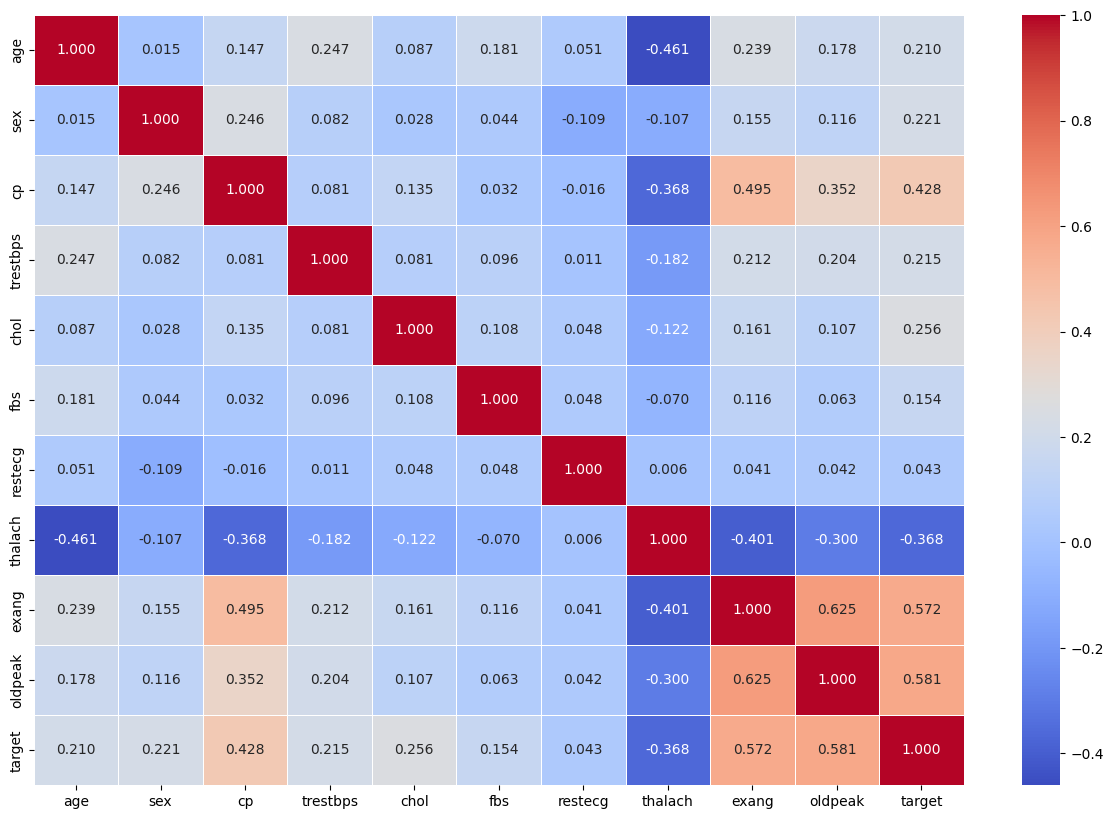

In [ ]:
# Menghitung matriks korelasi untuk DataFrame dfClean
cor_mat = dfClean.corr()

# Membuat visualisasi heatmap untuk matriks korelasi
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cor_mat, annot=True, linewidths=0.5, fmt=".3f", cmap='coolwarm')



**Kesimpulan dari Matriks Korelasi:**

1. **Usia (Age):**
  - Berkorelasi positif `('sex'), ('cp'),('trestbps'),('chol')('fbs'),('retecg'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan detak jantung maksimum `('thalach')`. *Semakin tinggi usia, semakin rendah detak jantung maksimum.*

2. **Jenis Kelamin (Sex):**
 - Berkorelasi positif dengan `('cp'),('trestbps'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan `('retecg') dan ('thalach').`
3. **Jenis Nyeri Dada (Chest Pain Type - cp):**
 - Berkorelasi positif dengan `('sex'),('trestbps'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target')`
   - Berkorelasi negatif dengan `('retecg') dan ('thalach').`

4. **Tekanan Darah Istirahat (Resting Blood Pressure - trestbps):**
 - Berkorelasi positif dengan `('sex'),('cp'),('chol'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`
5. **Kolesterol (Cholesterol):**
 - Berkorelasi positif dengan `('sex'),('cp'),('trestbps'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`.

6. **Gula Darah Puasa (Fasting Blood Sugar - fbs):**
 - Berkorelasi positif dengan `('sex'),('cp'),('trestbps'),('chol'),('age'),('exang'),('oldpeak'),('target'),('retecg')`
   - Berkorelasi negatif dengan `('thalach').`.
7. **Elektrokardiograf Resting (Resting Electrocardiographic Results - restecg):**
 - Berkorelasi positif dengan `('trestbps'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('chol'),('thalach')`
   - Berkorelasi negatif dengan `('sex'),('cp').`.

8. **Detak Jantung Maksimum (Maximum Heart Rate Achieved - thalach):**
 - Berkorelasi positif dengan `('retecg')`
   - Berkorelasi negatif dengan `('sex'),('cp'),('fbs'),('age'),('exang'),('oldpeak'),('target'),('trestbps'),('chol') .`

9. **Angina Saat Berolahraga (Exercise Induced Angina - exang):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('oldpeak')` dan hasil diagnosis `('target').`
   - Berkorelasi negatif dengan `('thalach').`.

10. **Depresi ST (ST Depression Induced by Exercise Relative to Rest - oldpeak):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('exang')` dan hasil diagnosis `('target').`
   - Berkorelasi negatif dengan `('thalach').`.


11. **Hasil Diagnosis (Target):**
   - Berkorelasi positif dengan `('sex'),('cp'),('age'),('trestbps'),('retecg'),('chol'),('fbs')`
   - Berkorelasi positif sangat kuat dengan depresi ST `('exang')` dan hasil diagnosis `('oldpeak').`
   - Berkorelasi negatif dengan `('thalach').`.

**Catatan:**
- Korelasi tidak menyiratkan sebab-akibat; hasil ini hanya memberikan gambaran tentang hubungan statistik antara variabel.
- Analisis lebih lanjut dan kontekstual, serta penggunaan model statistik yang lebih lanjut, dapat memberikan wawasan yang lebih mendalam tentang faktor-faktor yang memengaruhi kesehatan jantung dalam dataset ini.

### *PAIR PLOT*



---


Membuat scatter plot untuk setiap pasangan variabel dalam dataset. Berguna untuk melihat hubungan dan distribusi antar variabel.

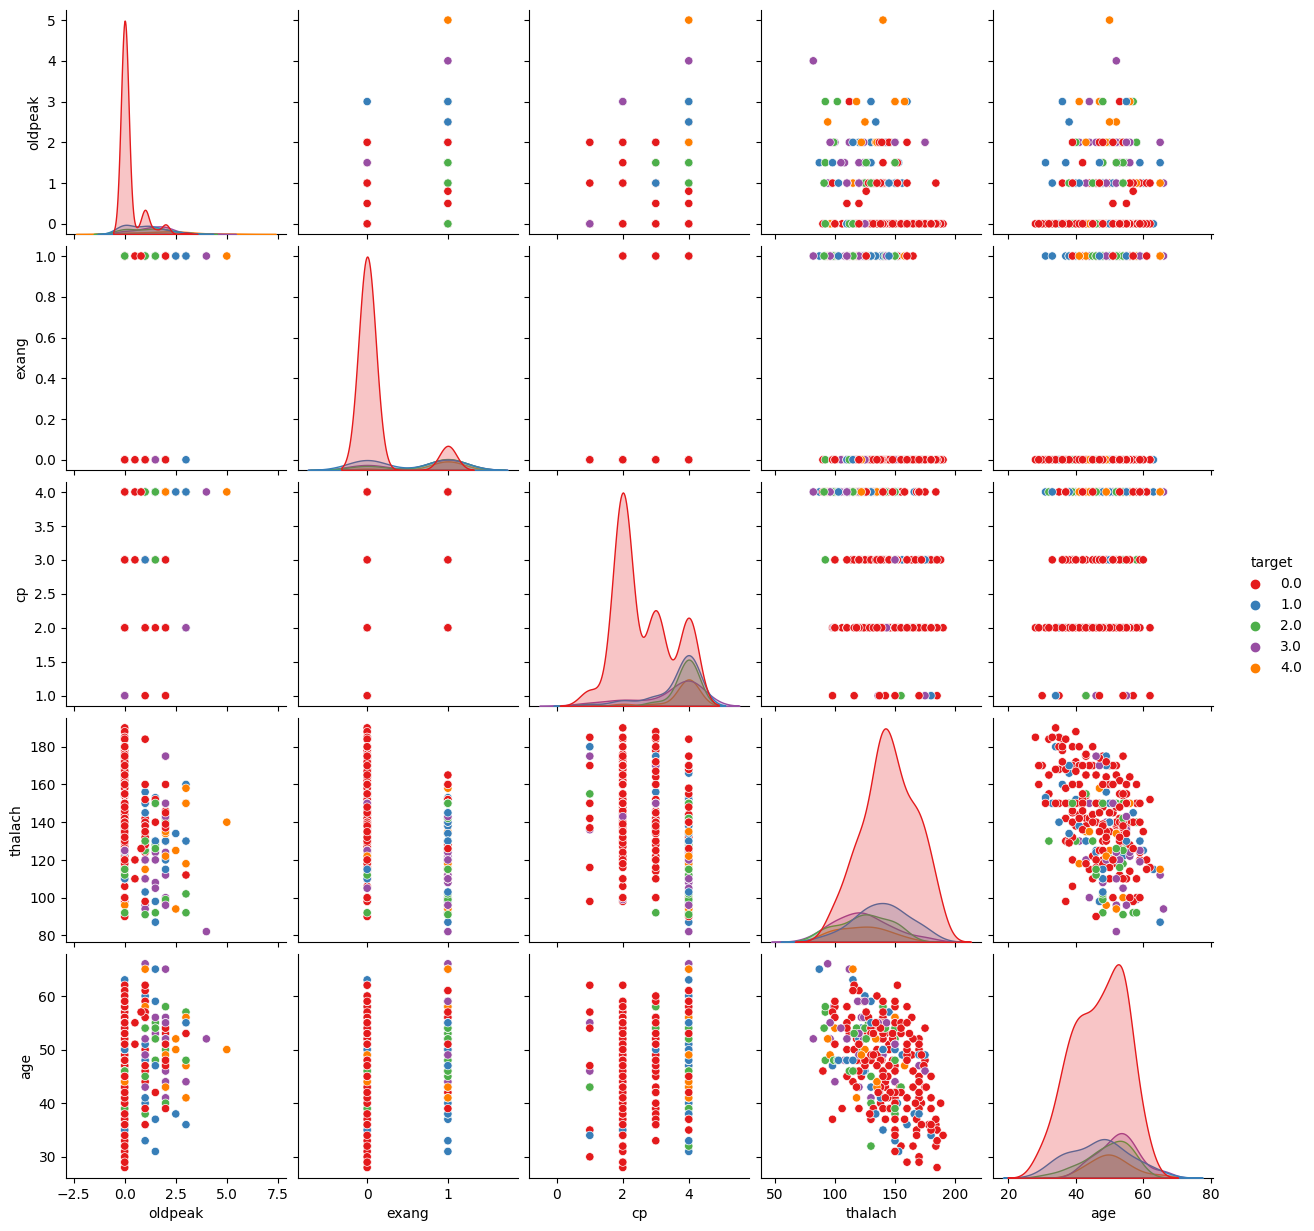

In [ ]:
# Menentukan variabel 'target' sebagai hue dan memilih beberapa variabel 'oldpeak', 'exang', 'cp', 'thalach', 'age' dipilih sebagai variabel untuk pair plot

sns.pairplot(dfClean, hue='target', vars=['oldpeak', 'exang', 'cp', 'thalach', 'age'], palette='Set1')

# **TUGAS MINGGU 2**

NAMA  : REYHAN VITO IDHAM PRATAMA

NIM   : A11.2020.12981

Tugas Minggu 2 berupa link GitHub yang berisi repository codingan dari dataset
hungarian.data Tugas Minggu 2 yang akan di-submit oleh mahasiswa Bimbingan Karir -
Data Science diharapkan sesuai dengan ketentuan berikut:
1. Tugas Minggu 2 wajib sampai ke tahap Evaluasi Model dan Kesimpulan(jika lebih
dari tahap tersebut lebih baik)
2. Ketentuan dalam source code Tugas Minggu 2 harus ada beberapa point berikut :

  1) Konstruksi data

  2) Membangun Model
  
  3) Evaluasi Model
  
  4) Kesimpulan
3. Berikan keterangan atau penjelasan dengan bahasa masing-masing di setiap point /
step dalam source codenya.
4. Format nama file pdf yaitu ‘nim_tugasMinggu2’

## **6. KONTRUKSI DATA**


### *PEMBENTUKAN DATA LATIH DAN DATA UJI*

In [ ]:
# Mengambil seluruh kolom dari DataFrame dfClean kecuali kolom "target"
X = dfClean.drop("target", axis=1).values

# Mengambil kolom "target" sebagai target atau output dari model
y = dfClean.iloc[:, -1]


Dengan demikian, X akan berisi fitur-fitur ***(semua kolom kecuali "target")***, dan y akan berisi target atau output yang merupakan kolom "target".

### *HANDLE IMBALANCE DATA*

**HANDLE IMBALANCE DATA** mengacu pada strategi dan teknik yang digunakan untuk mengatasi masalah ketidakseimbangan dalam dataset, di mana jumlah sampel untuk setiap kelas tidak seimbang. Ketidakseimbangan data dapat terjadi dalam berbagai jenis tugas pembelajaran mesin, seperti klasifikasi, di mana satu kelas memiliki jumlah sampel yang jauh lebih sedikit daripada kelas lainnya.

Beberapa cara umum untuk menangani ketidakseimbangan data melibatkan:

1. **Oversampling:** Meningkatkan jumlah sampel dari kelas minoritas dengan menggandakan atau menciptakan sampel baru dari data yang sudah ada.
  
2. **Undersampling:** Mengurangi jumlah sampel dari kelas mayoritas dengan menghapus atau mengurangi sampel-sampel dari data yang sudah ada.

3. **Synthetic Data Generation:** Menciptakan data sintetis untuk kelas minoritas dengan menggunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique).

4. **Weighted Loss:** Memberikan bobot yang lebih tinggi untuk kesalahan klasifikasi pada kelas minoritas, sehingga model lebih peka terhadap kelas tersebut.

5. **Ensemble Methods:** Menggabungkan hasil dari beberapa model untuk meningkatkan kinerja pada kelas minoritas.

6. **Resampling Techniques:** Menggunakan teknik-teknik khusus seperti ADASYN (Adaptive Synthetic Sampling) untuk menangani ketidakseimbangan.

Pilihan teknik penanganan yang tepat tergantung pada konteks data dan tugas spesifik. Pemilihan metode harus mempertimbangkan dampaknya terhadap kinerja model dan karakteristik data yang ada.

### *HORIZONTAL BAR CHART*

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200')])

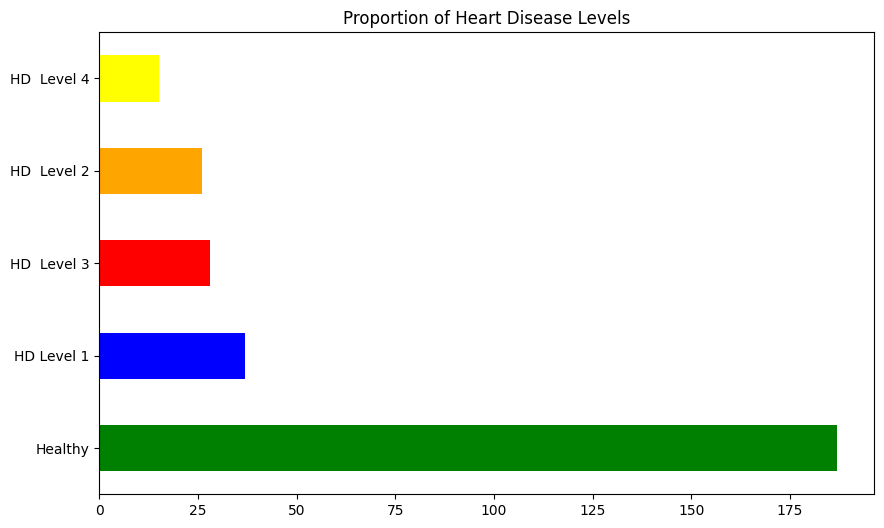

In [ ]:
import matplotlib.pyplot as plt

# Mapping kelas ke label yang lebih deskriptif
class_labels = {
    0: 'Healthy',
    1: 'HD Level 1', #Heart Disease Level 1
    2: 'HD  Level 2', #Heart Disease Level 2
    3: 'HD  Level 3', #Heart Disease Level 3
    4: 'HD  Level 4' #Heart Disease Level 4
}

# Mengganti nilai kelas dengan label yang sesuai
dfClean['target_labels'] = dfClean['target'].map(class_labels)

# Membuat Bar chart
dfClean['target_labels'].value_counts().plot(kind='barh', figsize=(10, 6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Proportion of Heart Disease Levels")
# Mengatur label sumbu x agar tidak condong
plt.xticks(rotation=0)



### *VERTIKAL BAR CHART*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'HD Level 1'),
  Text(2, 0, 'HD  Level 3'),
  Text(3, 0, 'HD  Level 2'),
  Text(4, 0, 'HD  Level 4')])

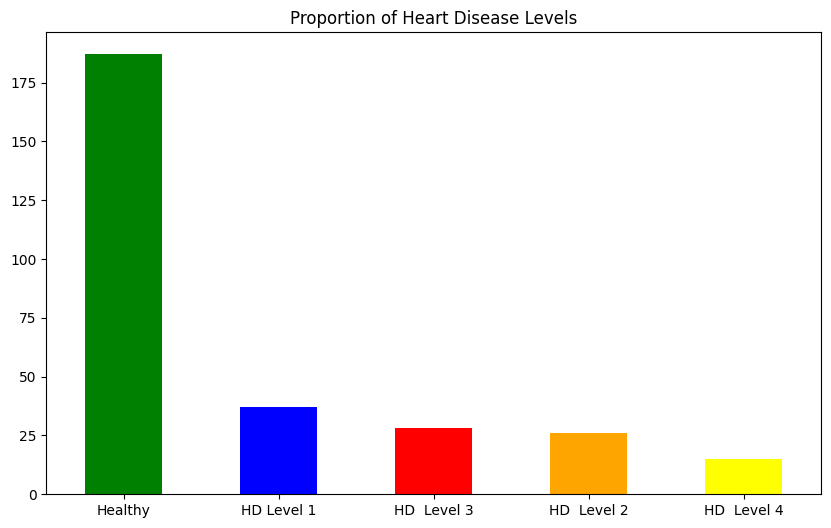

In [ ]:
import matplotlib.pyplot as plt

# Mapping kelas ke label yang lebih deskriptif
class_labels = {
    0: 'Healthy',
    1: 'HD Level 1', #Heart Disease Level 1
    2: 'HD  Level 2', #Heart Disease Level 2
    3: 'HD  Level 3', #Heart Disease Level 3
    4: 'HD  Level 4' #Heart Disease Level 4
}

# Mengganti nilai kelas dengan label yang sesuai
dfClean['target_labels'] = dfClean['target'].map(class_labels)

# Membuat Bar chart
dfClean['target_labels'].value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Proportion of Heart Disease Levels")
# Mengatur label sumbu x agar tidak condong
plt.xticks(rotation=0)



### *PIE CHART*

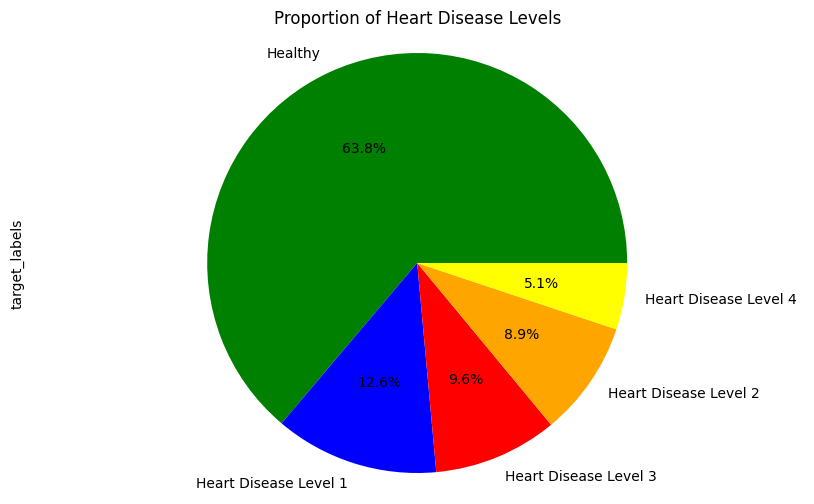

In [ ]:
import matplotlib.pyplot as plt

# Mapping kelas ke label yang lebih deskriptif
class_labels = {
    0: 'Healthy',
    1: 'Heart Disease Level 1',
    2: 'Heart Disease Level 2',
    3: 'Heart Disease Level 3',
    4: 'Heart Disease Level 4'
}

# Mengganti nilai kelas dengan label yang sesuai
dfClean['target_labels'] = dfClean['target'].map(class_labels)

# Membuat pie chart
dfClean['target_labels'].value_counts().plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', colors=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Proportion of Heart Disease Levels")
plt.axis('equal')
plt.show()


Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.
Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE


### *OVERSAMPLING SMOTE*



---


***Oversampling SMOTE (Synthetic Minority Over-sampling Technique)*** adalah sebuah teknik dalam penanganan ketidakseimbangan kelas pada dataset, khususnya ketika kelas minoritas memiliki jumlah sampel yang jauh lebih sedikit dibandingkan kelas mayoritas. SMOTE bekerja dengan cara menghasilkan sampel sintetis untuk kelas minoritas, sehingga seimbang dengan kelas mayoritas.

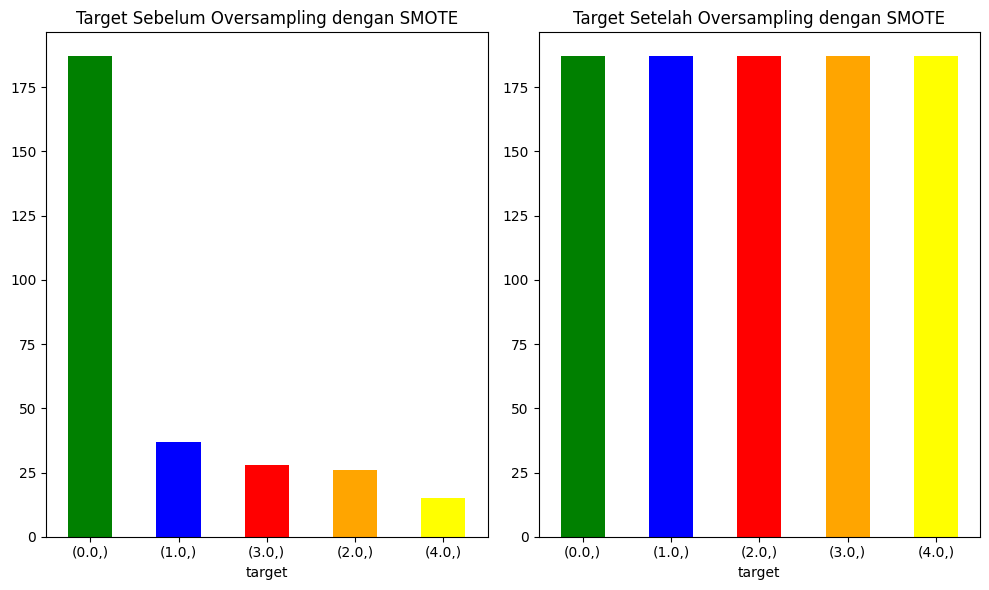

In [ ]:
from imblearn.over_sampling import SMOTE

# Membuat instance dari kelas SMOTE dengan random state tertentu
smote = SMOTE(random_state=42)

# Menggunakan SMOTE untuk melakukan oversampling pada kelas minoritas
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)


# Memplot distribusi variabel target sebelum SMOTE
plt.figure(figsize=(12, 4))
new_df_smote = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df_smote.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Sebelum Oversampling dengan SMOTE")
plt.xticks(rotation=0)

# Memplot distribusi variabel target setelah SMOTE
plt.subplot(1, 2, 2)
new_df_after_smote = pd.DataFrame(data=y_smote_resampled)
new_df_after_smote.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Setelah Oversampling dengan SMOTE")
plt.xticks(rotation=0)

# Penyesuaian tata letak untuk visualisasi yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()


Dengan melakukan proses SMOTE, distribusi kelas minoritas telah diubah dengan menambahkan sampel sintetis sehingga jumlahnya seimbang dengan kelas mayoritas. Visualisasi menggunakan bar chart membantu melihat perubahan distribusi sebelum dan setelah proses oversampling.

In [ ]:
# Membuat DataFrame dari kolom target sebelum SMOTE
new_df_smote = pd.DataFrame(data=y)

# Menampilkan distribusi nilai target sebelum SMOTE
new_df_smote.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
# Membuat DataFrame dari kolom target setelah SMOTE
new_df_after_smote = pd.DataFrame(data=y_smote_resampled)

# Menampilkan distribusi nilai target setelah SMOTE
new_df_after_smote.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

### *RANDOM OVERSAMPLING*



---


***Random Oversampling*** adalah metode oversampling yang melibatkan penambahan ulang sampel secara acak dari kelas minoritas sehingga jumlahnya menjadi seimbang dengan kelas mayoritas. Tujuannya adalah meningkatkan representasi kelas minoritas dalam dataset sehingga model pembelajaran mesin dapat lebih baik memahami dan memprediksi kelas tersebut.

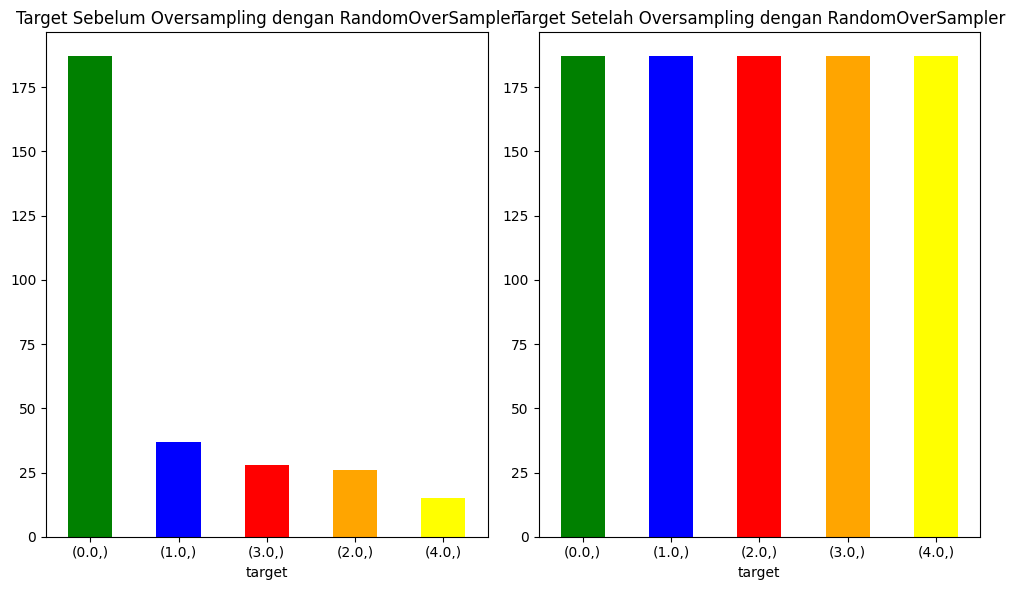

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Membuat instance dari kelas RandomOverSampler dengan random state tertentu
ros = RandomOverSampler(random_state=42)

# Menggunakan RandomOverSampler untuk melakukan oversampling pada kelas minoritas
X_ros_resampled, y_ros_resampled = ros.fit_resample(X, y)

# Memplot distribusi variabel target sebelum RandomOverSampler
plt.figure(figsize=(12, 4))
new_dfros = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_dfros.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Sebelum Oversampling dengan RandomOverSampler")
plt.xticks(rotation=0)

# Memplot distribusi variabel target setelah RandomOverSampler
plt.subplot(1, 2, 2)
new_dfafterros = pd.DataFrame(data=y_smote_resampled)
new_dfafterros.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Setelah Oversampling dengan RandomOverSampler")
plt.xticks(rotation=0)

# Penyesuaian tata letak untuk visualisasi yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()


Dengan melakukan proses Random Oversampling, distribusi kelas minoritas telah diubah dengan menambahkan ulang sampel secara acak sehingga jumlahnya seimbang dengan kelas mayoritas. Visualisasi menggunakan bar chart membantu melihat perubahan distribusi sebelum dan setelah proses oversampling.







In [ ]:
# Membuat DataFrame dari kolom target sebelum RandomOverSampler
new_dfros = pd.DataFrame(data=y)
# Menampilkan distribusi nilai target sebelum RandomOverSampler
new_dfros.value_counts()


target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
# Membuat DataFrame dari kolom target setelah RandomOverSampler
new_dfafterros = pd.DataFrame(data=y_smote_resampled)
# Menampilkan distribusi nilai target setelah RandomOverSampler
new_dfafterros.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

### *ADASYN (ADAPTIVE SYNTHENIC SAMPLING)*



---

***ADASYN (Adaptive Synthetic Sampling)*** adalah metode oversampling yang dirancang untuk menangani ketidakseimbangan kelas pada dataset dengan cara adaptif. ADASYN berfokus pada penambahan sampel sintetis pada kelas minoritas, tetapi dengan penekanan pada penghasilan sampel di wilayah dataset yang kurang terepresentasikan.

ADASYN memberikan penekanan pada penghasilan sampel sintetis di wilayah dataset yang kurang terepresentasikan, sehingga membantu mencegah overfitting. Proses ini dilakukan secara adaptif berdasarkan distribusi aktual dari dataset, sehingga lebih sesuai dengan kondisi dunia nyata.

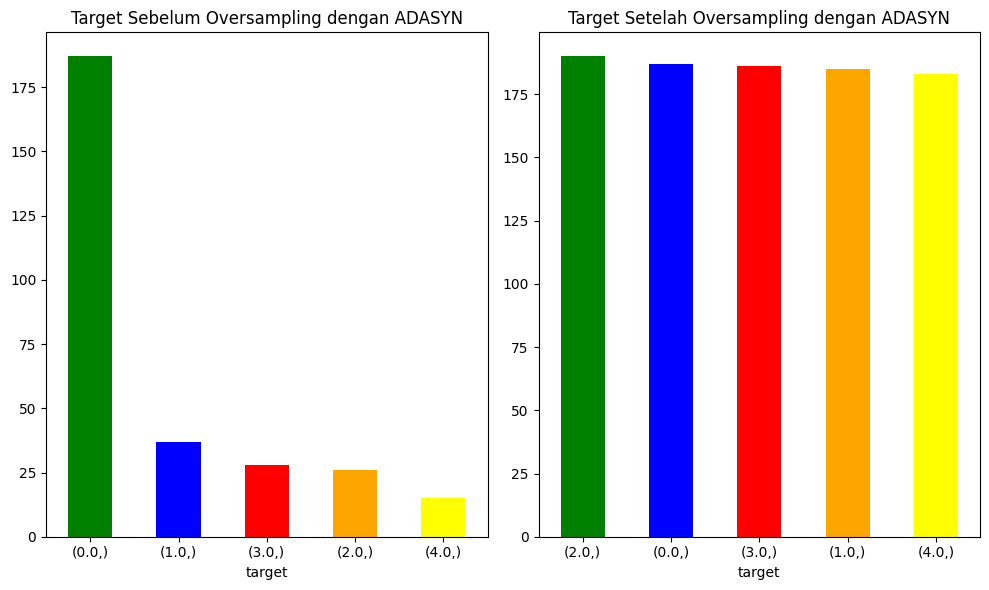

In [ ]:
from imblearn.over_sampling import ADASYN

# Menggunakan ADASYN untuk oversampling
adasyn = ADASYN(random_state=42)
X_adasyn_resampled, y_adasyn_resampled = adasyn.fit_resample(X, y)

# Memplot distribusi variabel target sebelum ADASYN
plt.figure(figsize=(12, 4))
new_df_adasyn = pd.DataFrame(data=y)
plt.subplot(1, 2, 1)
new_df_adasyn.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Sebelum Oversampling dengan ADASYN")
plt.xticks(rotation=0)

# Memplot distribusi variabel target setelah ADASYN
plt.subplot(1, 2, 2)
new_df_after_adasyn = pd.DataFrame(data=y_adasyn_resampled)
new_df_after_adasyn.value_counts().plot(kind='bar', figsize=(10,6), color=['green', 'blue', 'red', 'orange','yellow'])
plt.title("Target Setelah Oversampling dengan ADASYN")
plt.xticks(rotation=0)

# Penyesuaian tata letak untuk visualisasi yang lebih baik
plt.tight_layout()

# Menampilkan plot
plt.show()


Dengan menggunakan ADASYN, distribusi kelas minoritas diubah dengan menambahkan sampel sintetis untuk mencapai keseimbangan dengan kelas mayoritas. Visualisasi menggunakan bar chart membantu memahami perubahan distribusi sebelum dan setelah proses oversampling.

In [ ]:
# Membuat DataFrame dari kolom target sebelum ADASYN
new_df_adasyn = pd.DataFrame(data=y)
# Menampilkan distribusi nilai target sebelum ADASYN
new_df_adasyn.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [ ]:
# Membuat DataFrame dari kolom target setelah ADASYN
new_df_after_adasyn = pd.DataFrame(data=y_smote_resampled)
# Menampilkan distribusi nilai target setelah ADASYN
new_df_after_adasyn.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

### *DATA SCALING*



---


**Data Scaling** adalah suatu proses di mana kita mengubah rentang nilai dari suatu fitur dalam dataset. Tujuannya adalah untuk memastikan bahwa setiap fitur memiliki dampak yang sebanding terhadap hasil model, terutama dalam konteks algoritma pembelajaran mesin yang menggunakan perhitungan jarak atau bobot, seperti k-nearest neighbors (KNN) atau gradient descent pada algoritma machine learning.

Normalisasi dan standarisasi adalah dua metode umum dalam proses data scaling:

1. **Normalisasi:**
   - Normalisasi (Min-Max Scaling) mengubah nilai fitur ke rentang [0, 1].
   - Formula normalisasi: $$X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$
   - Normalisasi berguna ketika data memiliki distribusi tidak normal dan ketika kita ingin mempertahankan interpretabilitas skala asli data.

2. **Standarisasi:**
   - Standarisasi me
   ngubah nilai fitur sehingga memiliki rata-rata nol dan deviasi standar satu.
   - Formula standarisasi: $$X_{\text{std}} = \frac{X - \text{mean}(X)}{\text{std}(X)}$$
   - Standarisasi biasanya lebih baik ketika data memiliki distribusi normal atau mendekati normal dan ketika kita tidak memiliki asumsi tentang distribusi data.

Kedua metode ini membantu mengatasi masalah ketidakseimbangan skala dalam fitur-fitur dataset, sehingga memastikan bahwa setiap fitur memberikan kontribusi yang seimbang terhadap model.



In [ ]:
# Menampilkan statistik deskriptif untuk setiap kolom numerik dalam DataFrame
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

### *MIN-MAX SCALING OVERSAMPLING SMOTE*

**Min-Max Scaling** adalah salah satu metode normalisasi data yang mengubah nilai-nilai dalam suatu dataset ke dalam rentang tertentu, biasanya antara 0 dan 1. Min-Max Scaling dilakukan dengan menggunakan rumus berikut:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

$$ {\text{ dimana :}} $$
$$ X_{\text{ adalah nilai asli.}} $$
$$ X_{\text{scaled adalah nilai yang telah dinormalisasi.}} $$
$$ X_{\text{min adalah nilai minimum dalam dataset.}} $$
$$ X_{\text{max adalah nilai maximum dalam dataset.}} $$

Min-Max Scaling bermanfaat ketika ingin memastikan bahwa semua variabel memiliki skala yang serupa, sehingga tidak ada variabel yang mendominasi yang lain.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengaplikasikan Min-Max Scaling pada data yang sudah di-SMOTE oversampling
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

# Menampilkan panjang data setelah scaling
len(X_smote_resampled_normal)

935

Setelah SMOTE Oversampling, jumlah sampel dalam dataset juga telah meningkat menjadi 935.

In [ ]:
# Membuat DataFrame dari hasil Min-Max Scaling pada data yang sudah di-SMOTE oversampling
dfceksmote = pd.DataFrame(X_smote_resampled_normal)

# Menampilkan statistik deskriptif untuk setiap kolom numerik dalam DataFrame
dfceksmote.describe()


,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hasil Min-Max Scaling menunjukkan bahwa nilai-nilai dalam dataset telah dinormalisasi ke dalam rentang antara 0 dan 1.

### *MIN-MAX SCALING RANDOM OVERSAMPLING*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengaplikasikan Min-Max Scaling pada data yang sudah di RANDOM OVERSAMPLING
X_ros_resampled_normal = scaler.fit_transform(X_ros_resampled)

# Menampilkan panjang data setelah scaling
len(X_ros_resampled_normal)

935

Setelah Random Oversampling, jumlah sampel dalam dataset telah meningkat menjadi 935 dari sebelumnya.

In [ ]:
# Membuat DataFrame dari hasil Min-Max Scaling pada data yang sudah di RANDOM OVERSAMPLING
dfcekros = pd.DataFrame(X_ros_resampled_normal)

# Menampilkan statistik deskriptif untuk setiap kolom numerik dalam DataFrame
dfcekros.describe()


,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.557304,0.833155,0.815330,0.404496,0.351721,0.094118,0.107487,0.454654,0.560428,0.219316
std,0.194963,0.373037,0.295703,0.174823,0.146737,0.292149,0.219371,0.210036,0.496601,0.229847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.421053,1.000000,0.666667,0.259259,0.260618,0.000000,0.000000,0.305556,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.351852,0.320463,0.000000,0.000000,0.444444,1.000000,0.200000
75%,0.684211,1.000000,1.000000,0.490741,0.397683,0.000000,0.000000,0.629630,1.000000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hasil Min-Max Scaling menunjukkan bahwa nilai-nilai dalam dataset telah dinormalisasi ke dalam rentang antara 0 dan 1.

### *MIN-MAX SCALING ADASYN (ADAPTIVE SYNTHENIC SAMPLING)*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Mengaplikasikan Min-Max Scaling pada data yang sudah di ADASYN (ADAPTIVE SYNTHENIC SAMPLING)
X_adasyn_resampled_normal = scaler.fit_transform(X_adasyn_resampled)

# Menampilkan panjang data setelah scaling
len(X_adasyn_resampled_normal)

931

 Setelah dilakukan scaling, panjang data setelah proses scaling adalah 931. Hal ini menunjukkan bahwa jumlah sampel dalam dataset setelah proses scaling adalah 931.

In [ ]:
# Membuat DataFrame dari hasil Min-Max Scaling pada data yang sudah di ADASYN (ADAPTIVE SYNTHENIC SAMPLING)
dfcekadasyn = pd.DataFrame(X_adasyn_resampled_normal)

# Menampilkan statistik deskriptif untuk setiap kolom numerik dalam DataFrame
dfcekadasyn.describe()


,0,1,2,3,4,5,6,7,8,9
count,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000,931.000000
mean,0.565875,0.836464,0.809273,0.400088,0.344164,0.105347,0.120968,0.452117,0.576168,0.220987
std,0.179878,0.336540,0.280427,0.144169,0.124772,0.267621,0.204396,0.198791,0.449630,0.196493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.467442,1.000000,0.666667,0.296296,0.264296,0.000000,0.000000,0.307529,0.000000,0.007253
50%,0.578947,1.000000,1.000000,0.395041,0.325578,0.000000,0.000000,0.444444,0.812800,0.200000
75%,0.693917,1.000000,1.000000,0.474692,0.393964,0.000000,0.212287,0.593706,1.000000,0.375591
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dengan Min-Max Scaling, nilai-nilai dalam dataset telah dinormalisasi ke dalam rentang antara 0 dan 1, sehingga memudahkan perbandingan antar variabel yang memiliki skala yang berbeda. Dengan kata lain, skala variabel-variabel dalam dataset sudah disesuaikan agar memiliki rentang nilai yang serupa.

### *PEMBAGIAN DATA TESTING DAN TRAINING*

Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [ ]:
from sklearn.model_selection import train_test_split

# membagi fitur dan target menjadi data train dan test (untuk yang oversample smote)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang random oversample)
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(X_ros_resampled, y_ros_resampled, test_size=0.2, random_state=42,stratify=y_ros_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang adasyn oversample)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn_resampled, y_adasyn_resampled, test_size=0.2, random_state=42,stratify=y_adasyn_resampled)


# membagi fitur dan target menjadi data train dan test (untuk yang oversample smote + normalization)
X_train_normal_smote, X_test_normal_smote, y_train_normal_smote, y_test_normal_smote = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang oversample smote + normalization)
X_train_normal_random, X_test_normal_random, y_train_normal_random, y_test_normal_random = train_test_split(X_ros_resampled_normal, y_ros_resampled, test_size=0.2, random_state=42,stratify = y_ros_resampled)

# membagi fitur dan target menjadi data train dan test (untuk yang adasyn oversample + normalization)
X_train_normal_adasyn, X_test_normal_adasyn, y_train_normal_adasyn, y_test_normal_adasyn = train_test_split(X_adasyn_resampled_normal, y_adasyn_resampled, test_size=0.2, random_state=42,stratify = y_adasyn_resampled)

## **7. Modelling**

## OVERSAMPLE SMOTE

Disini, saya melakukan pengujian terhadap tiga algoritma, yaitu
1. KNN (K-Nearest Neighbors)
2. Random Forest
3. XGBoost

Pengujian dilakukan dengan menggunakan ***metode oversampling SMOTE (Synthetic Minority Over-sampling Technique)*** untuk mengatasi ketidakseimbangan dalam dataset. Setiap algoritma dievaluasi dan dibandingkan berdasarkan performa hasil oversampling SMOTE pada data yang telah diproses.



In [ ]:
# Import library yang dibutuhkan
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

# Mendefinisikan fungsi evaluasi
def evaluation(Y_test,Y_pred):
  # Menghitung metrik evaluasi
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

# Menyimpan hasil metrik dalam dictionary
  metric_dict={'accuracy': round(acc,3), 'recall': round(rcl,3),
    'F1 score': round(f1,3),
    'Precision score': round(ps,3)
    }

# Menampilkan hasil metrik
  return print(metric_dict)


Di atas terdapat sebuah fungsi yang dirancang untuk menampilkan hasil akurasi serta nilai rata-rata dari recall, f1, dan precision score pada setiap model. Fungsi ini diintegrasikan pada setiap model yang dievaluasi. Pembuatan fungsi ini bersifat opsional dan dapat membantu dalam memberikan gambaran komprehensif mengenai kinerja setiap model.

### OVERSAMPLE SMOTE KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat model KNN dengan 3 tetangga
knn_model_smote = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data oversampling SMOTE
knn_model_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

mengevaluasi model K-Nearest Neighbors (KNN) yang telah dilatih dengan menggunakan data oversampling SMOTE

In [ ]:
# Membuat prediksi menggunakan model KNN pada data pengujian
y_pred_knn_smote = knn_model_smote.predict(X_test_smote)

# Menampilkan hasil evaluasi model KNN
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test_smote, y_pred_knn_smote), 3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_knn_smote))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [ ]:
evaluation(y_test_smote,y_pred_knn_smote)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

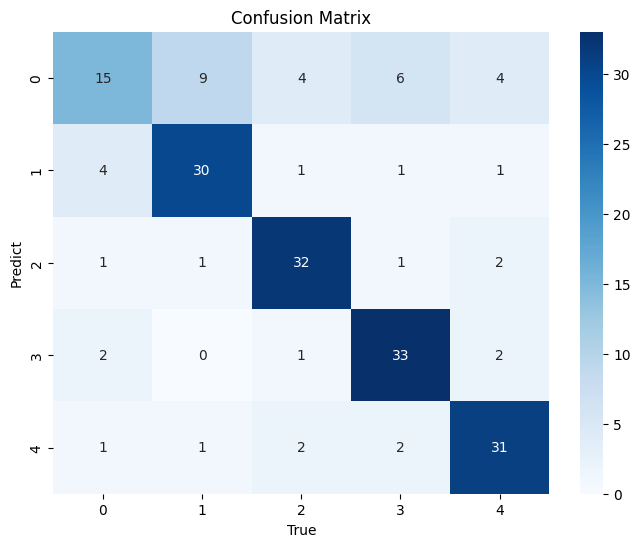

In [ ]:
# Menghitung confusion matrix untuk model KNN pada data pengujian SMOTE
cm_knn_smote = confusion_matrix(y_test_smote, y_pred_knn_smote)

# Menampilkan heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE SMOTE RANDOM FOREST

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun


In [ ]:
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_smote = rf_model_smote.predict(X_test_smote)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test_smote, y_pred_rf_smote),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_rf_smote))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_smote,y_pred_rf_smote)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


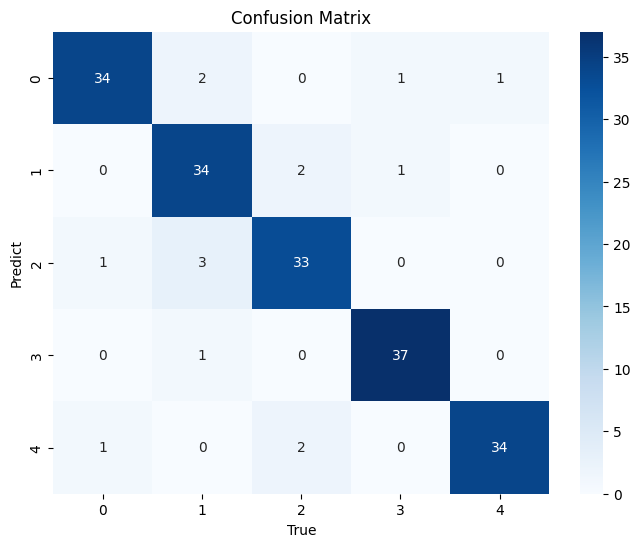

In [ ]:
cm_rf_smote = confusion_matrix(y_test_smote, y_pred_rf_smote)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_smote, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

###  OVERSAMPLE SMOTE XGBOOST

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [ ]:
xgb_model_smote = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_smote = xgb_model_smote.predict(X_test_smote)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test_smote, y_pred_xgb_smote),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test_smote, y_pred_xgb_smote))


Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test_smote,y_pred_xgb_smote)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


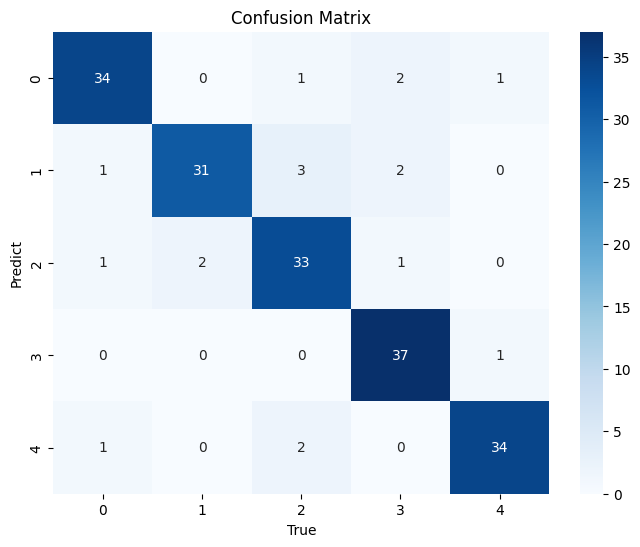

In [ ]:
cm_xgb_smote = confusion_matrix(y_test_smote, y_pred_xgb_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_smote, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE RANDOM

### OVERSAMPLE RANDOM KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_random = KNeighborsClassifier(n_neighbors = 3)
knn_model_random.fit(X_train_random, y_train_random)


KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [ ]:
y_pred_knn_random = knn_model_random.predict(X_test_random) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_random = round(accuracy_score(y_test_random,y_pred_knn_random),3)
print("Accuracy:", accuracy_knn_random)
print("Classification Report:")
print(classification_report(y_test_random, y_pred_knn_random))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.829
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.32      0.46        38
         1.0       0.77      1.00      0.87        37
         2.0       0.82      0.84      0.83        37
         3.0       0.84      1.00      0.92        38
         4.0       0.88      1.00      0.94        37

    accuracy                           0.83       187
   macro avg       0.83      0.83      0.80       187
weighted avg       0.83      0.83      0.80       187



In [ ]:
evaluation(y_test_random,y_pred_knn_random)

{'accuracy': 0.829, 'recall': 0.829, 'F1 score': 0.801, 'Precision score': 0.834}


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

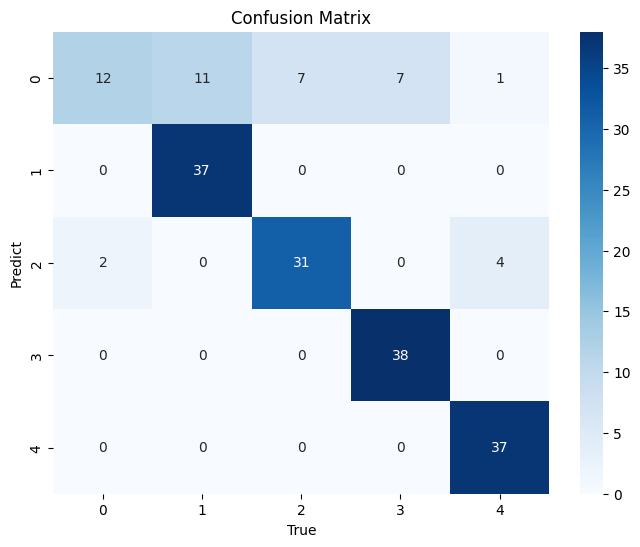

In [ ]:
cm_knn_random = confusion_matrix(y_test_random, y_pred_knn_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_random, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE RANDOM RANDOM FOREST

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun


In [ ]:
rf_model_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_random.fit(X_train_random, y_train_random)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_random = rf_model_random.predict(X_test_random)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_random = round(accuracy_score(y_test_random, y_pred_rf_random),3)
print("Accuracy:",accuracy_rf_random)
print("Classification Report:")
print(classification_report(y_test_random, y_pred_rf_random))


Accuracy: 0.979
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        38
         1.0       0.93      1.00      0.96        37
         2.0       1.00      1.00      1.00        37
         3.0       1.00      1.00      1.00        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.98       187
   macro avg       0.98      0.98      0.98       187
weighted avg       0.98      0.98      0.98       187



In [ ]:
evaluation(y_test_random,y_pred_rf_random)

{'accuracy': 0.979, 'recall': 0.979, 'F1 score': 0.978, 'Precision score': 0.98}


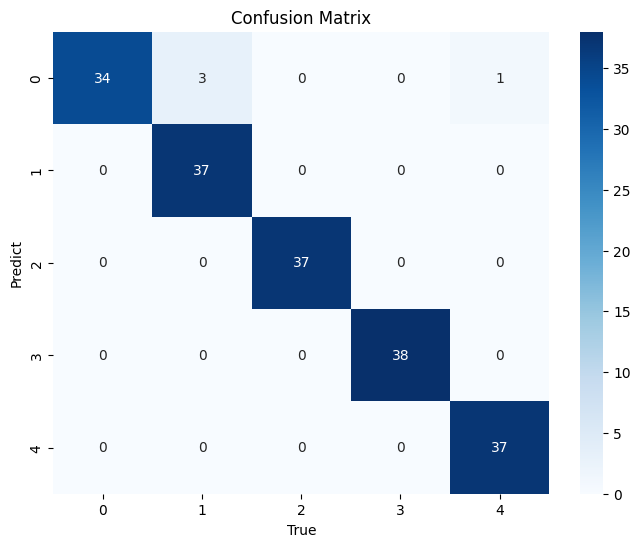

In [ ]:
cm_rf_random = confusion_matrix(y_test_random, y_pred_rf_random)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_random, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

###  OVERSAMPLE RANDOM XGBOOST

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [ ]:
xgb_model_random = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_random.fit(X_train_random, y_train_random)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_random = xgb_model_random.predict(X_test_random)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_random = round(accuracy_score(y_test_random, y_pred_xgb_random),3)
print("Accuracy:",accuracy_xgb_random)
print("Classification Report:")
print(classification_report(y_test_random, y_pred_xgb_random))


Accuracy: 0.984
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        38
         1.0       1.00      1.00      1.00        37
         2.0       0.97      1.00      0.99        37
         3.0       0.97      1.00      0.99        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.98       187
   macro avg       0.98      0.98      0.98       187
weighted avg       0.98      0.98      0.98       187



In [ ]:
evaluation(y_test_random,y_pred_xgb_random)

{'accuracy': 0.984, 'recall': 0.984, 'F1 score': 0.984, 'Precision score': 0.984}


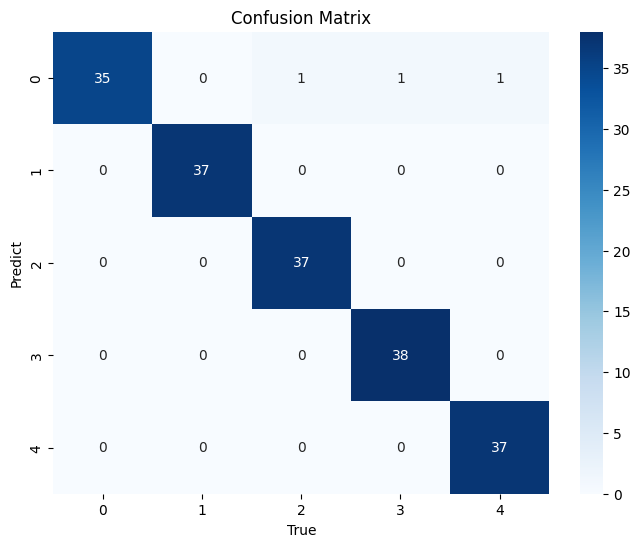

In [ ]:
cm_xgb_random = confusion_matrix(y_test_random, y_pred_xgb_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_random, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSASMPLE ADASYN

### OVERSAMPLE ADASYN KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_adasyn = KNeighborsClassifier(n_neighbors = 3)
knn_model_adasyn.fit(X_train_adasyn, y_train_adasyn)


KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [ ]:
y_pred_knn_adasyn = knn_model_adasyn.predict(X_test_adasyn) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_adasyn = round(accuracy_score(y_test_adasyn,y_pred_knn_adasyn),3)
print("Accuracy:", accuracy_knn_adasyn)
print("Classification Report:")
print(classification_report(y_test_adasyn, y_pred_knn_adasyn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.706
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.34      0.45        38
         1.0       0.71      0.78      0.74        37
         2.0       0.71      0.79      0.75        38
         3.0       0.68      0.73      0.70        37
         4.0       0.75      0.89      0.81        37

    accuracy                           0.71       187
   macro avg       0.70      0.71      0.69       187
weighted avg       0.70      0.71      0.69       187



In [ ]:
evaluation(y_test_adasyn,y_pred_knn_adasyn)

{'accuracy': 0.706, 'recall': 0.706, 'F1 score': 0.691, 'Precision score': 0.699}


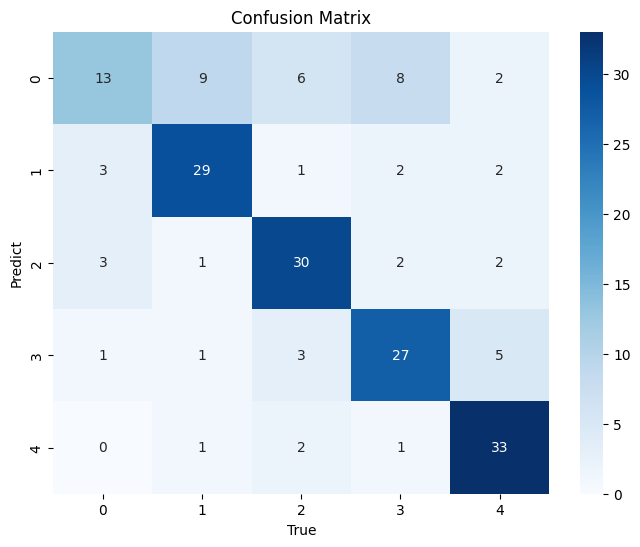

In [ ]:
cm_knn_adasyn = confusion_matrix(y_test_adasyn, y_pred_knn_adasyn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_adasyn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE ADASYN RANDOM FOREST

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun


In [ ]:
rf_model_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_adasyn.fit(X_train_adasyn, y_train_adasyn)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_adasyn = rf_model_adasyn.predict(X_test_adasyn)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_adasyn = round(accuracy_score(y_test_adasyn, y_pred_rf_adasyn),3)
print("Accuracy:",accuracy_rf_adasyn)
print("Classification Report:")
print(classification_report(y_test_adasyn, y_pred_rf_adasyn))


Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.90      0.95      0.92        37
         2.0       0.89      0.82      0.85        38
         3.0       0.94      0.89      0.92        37
         4.0       0.92      0.97      0.95        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_adasyn,y_pred_rf_adasyn)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.908, 'Precision score': 0.909}


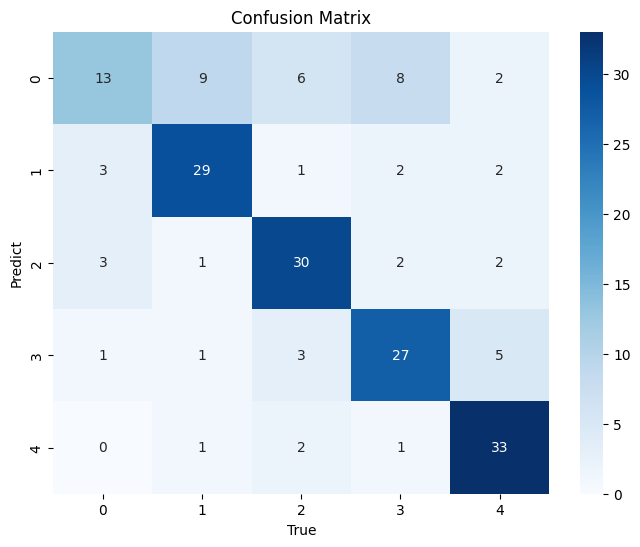

In [ ]:
cm_rf_adasyn = confusion_matrix(y_test_adasyn, y_pred_knn_adasyn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_adasyn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

###  OVERSAMPLE ADASYN XGBOOST

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [ ]:
xgb_model_adasyn = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_adasyn.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_adasyn = xgb_model_adasyn.predict(X_test_adasyn)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_adasyn = round(accuracy_score(y_test_adasyn, y_pred_xgb_adasyn),3)
print("Accuracy:",accuracy_xgb_adasyn)
print("Classification Report:")
print(classification_report(y_test_adasyn, y_pred_xgb_adasyn))


Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.88      0.95      0.91        37
         2.0       0.89      0.82      0.85        38
         3.0       0.91      0.86      0.89        37
         4.0       0.95      0.97      0.96        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [ ]:
evaluation(y_test_adasyn,y_pred_xgb_adasyn)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.904}


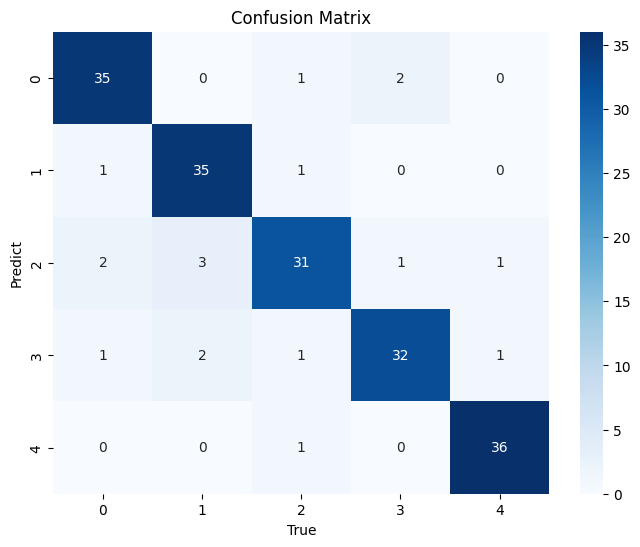

In [ ]:
cm_xgb_adasyn = confusion_matrix(y_test_adasyn, y_pred_xgb_adasyn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_adasyn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE SMOTE + NORMALISASI

### OVERSAMPLE SMOTE + NORMALISASI KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_smote_norm = KNeighborsClassifier(n_neighbors=3)
knn_model_smote_norm.fit(X_train_normal_smote, y_train_normal_smote)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_smote_norm = knn_model_smote_norm.predict(X_test_normal_smote) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal_smote,y_pred_knn_smote_norm),3)
print("Accuracy:", accuracy_knn_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_knn_smote_norm))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.861
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_knn_smote_norm)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


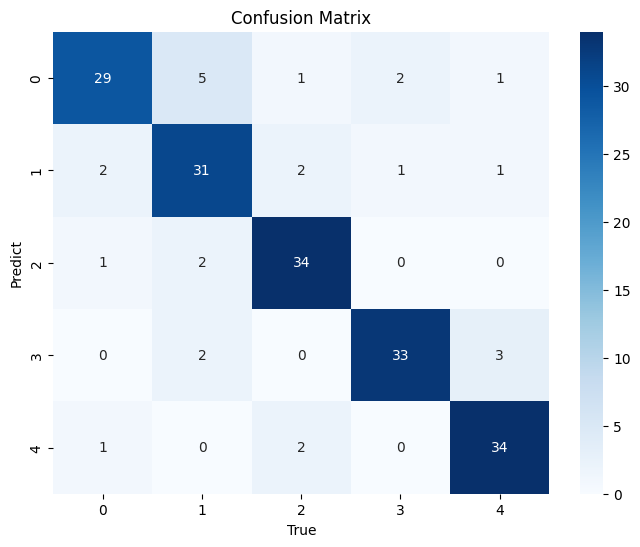

In [ ]:
cm_knn_smote_norm = confusion_matrix(y_test_normal_smote, y_pred_knn_smote_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE SMOTE + NORMALISASI RANDOM FOREST

In [ ]:
rf_model_smote_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_smote_norm.fit(X_train_normal_smote, y_train_normal_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_smote_norm = rf_model_smote_norm.predict(X_test_normal_smote) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal_smote, y_pred_rf_smote_norm),3)
print("Accuracy:",accuracy_rf_smote_normal )
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_rf_smote_norm))



Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_rf_smote_norm)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


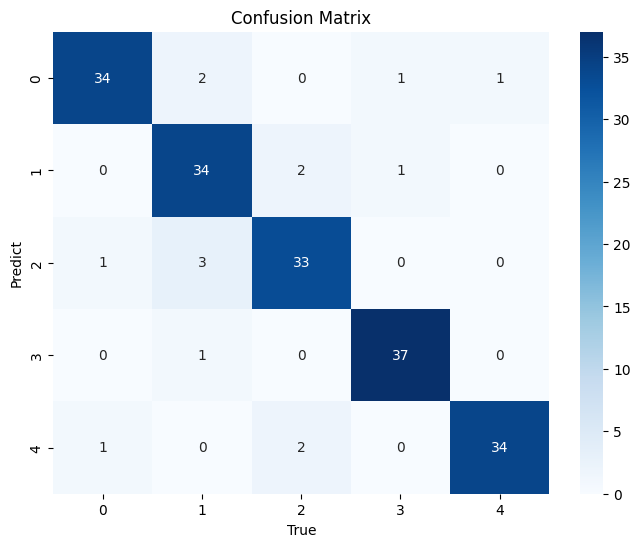

In [ ]:
cm_rf_smote_norm = confusion_matrix(y_test_normal_smote, y_pred_rf_smote_norm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_smote_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE SMOTE + NORMALISASI XGB

In [ ]:
xgb_model_smote_norm = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_smote_norm.fit(X_train_normal_smote, y_train_normal_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_smote_norm = xgb_model_smote_norm.predict(X_test_normal_smote) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal_smote, y_pred_xgb_smote_norm),3)
print("Accuracy:",accuracy_xgb_smote_normal)
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_xgb_smote_norm))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_xgb_smote_norm)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


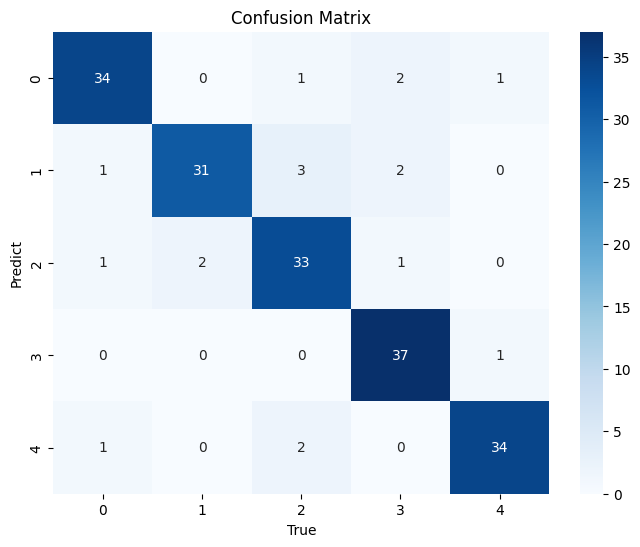

In [ ]:
cm_xgb_smote_norm = confusion_matrix(y_test_normal_smote, y_pred_xgb_smote_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_smote_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE RANDOM + NORMALISASI

### OVERSAMPLE RANDOM + NORMALISASI KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_random_norm = KNeighborsClassifier(n_neighbors=3)
knn_model_random_norm.fit(X_train_normal_random, y_train_normal_random)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_random_norm = knn_model_random_norm.predict(X_test_normal_random) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_random_norm = round(accuracy_score(y_test_normal_random,y_pred_knn_random_norm),3)
print("Accuracy:", accuracy_knn_random_norm)
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_knn_random_norm))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.936
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        38
         1.0       0.86      1.00      0.92        37
         2.0       0.92      0.97      0.95        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.94       187
   macro avg       0.94      0.94      0.93       187
weighted avg       0.94      0.94      0.93       187



In [ ]:
evaluation(y_test_normal_random,y_pred_knn_random_norm)

{'accuracy': 0.936, 'recall': 0.936, 'F1 score': 0.933, 'Precision score': 0.942}


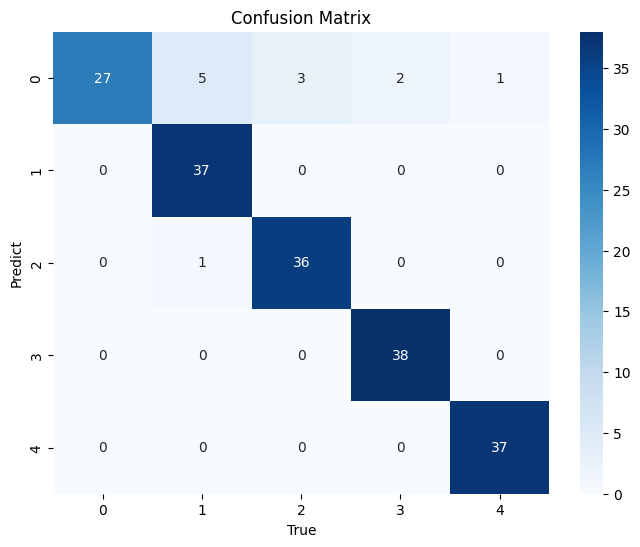

In [ ]:
cm_knn_random_norm = confusion_matrix(y_test_normal_random, y_pred_knn_random_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_random_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI RANDOM FOREST

In [ ]:
rf_model_random_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_random_norm.fit(X_train_normal_random, y_train_normal_random)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_random_norm = rf_model_random_norm.predict(X_test_normal_random) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_random_norm = round(accuracy_score(y_test_normal_random, y_pred_rf_random_norm),3)
print("Accuracy:",accuracy_rf_random_norm )
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_rf_random_norm))



Random Forest Model:
Accuracy: 0.979
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        38
         1.0       0.93      1.00      0.96        37
         2.0       1.00      1.00      1.00        37
         3.0       1.00      1.00      1.00        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.98       187
   macro avg       0.98      0.98      0.98       187
weighted avg       0.98      0.98      0.98       187



In [ ]:
evaluation(y_test_normal_random,y_pred_rf_random_norm)

{'accuracy': 0.979, 'recall': 0.979, 'F1 score': 0.978, 'Precision score': 0.98}


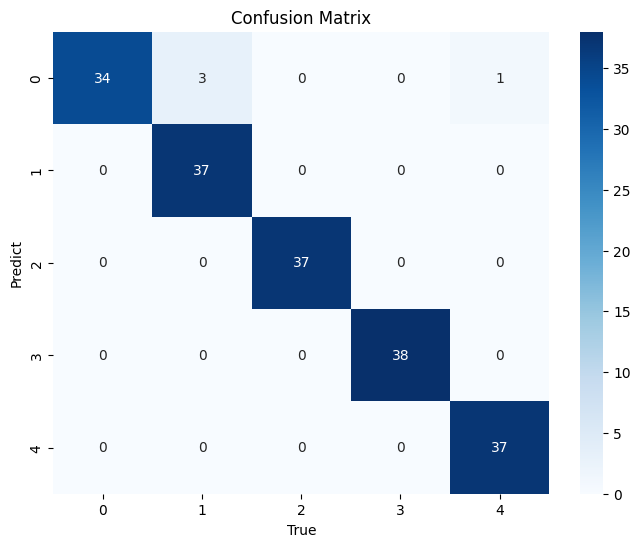

In [ ]:
cm_rf_random_norm = confusion_matrix(y_test_normal_random, y_pred_rf_random_norm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_random_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI XGB

In [ ]:
xgb_model_random_norm = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_random_norm.fit(X_train_normal_random, y_train_normal_random)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_random_norm = xgb_model_random_norm.predict(X_test_normal_random) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_random_norm = round(accuracy_score(y_test_normal_random, y_pred_xgb_random_norm),3)
print("Accuracy:",accuracy_xgb_random_norm)
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_xgb_random_norm))



XGBoost Model:
Accuracy: 0.984
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        38
         1.0       1.00      1.00      1.00        37
         2.0       0.97      1.00      0.99        37
         3.0       0.97      1.00      0.99        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.98       187
   macro avg       0.98      0.98      0.98       187
weighted avg       0.98      0.98      0.98       187



In [ ]:
evaluation(y_test_normal_random,y_pred_xgb_random_norm)

{'accuracy': 0.984, 'recall': 0.984, 'F1 score': 0.984, 'Precision score': 0.984}


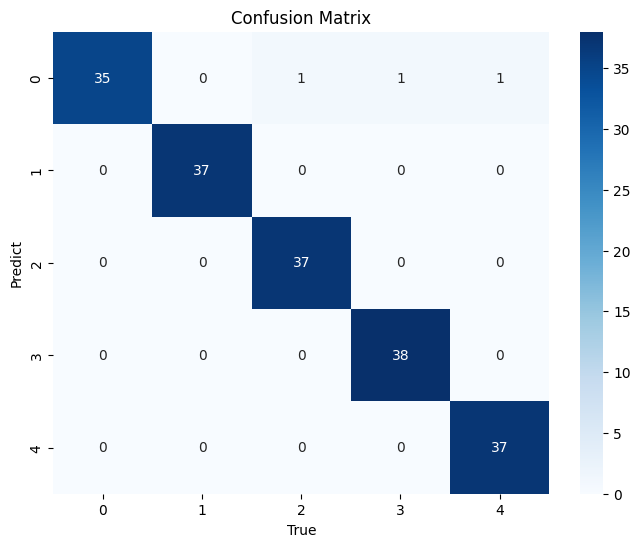

In [ ]:
cm_xgb_random_norm = confusion_matrix(y_test_normal_random, y_pred_xgb_random_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_random_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE ADASYN + NORMALISASI

### OVERSAMPLE ADASYN + NORMALISASI KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model_adasyn_norm = KNeighborsClassifier(n_neighbors=3)
knn_model_adasyn_norm.fit(X_train_normal_adasyn, y_train_normal_adasyn)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn_adasyn_norm = knn_model_adasyn_norm.predict(X_test_normal_adasyn) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_adasyn_norm = round(accuracy_score(y_test_normal_adasyn,y_pred_knn_adasyn_norm),3)
print("Accuracy:", accuracy_knn_adasyn_norm)
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_knn_adasyn_norm))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.856
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        38
         1.0       0.85      0.78      0.82        37
         2.0       0.77      0.89      0.83        38
         3.0       0.94      0.78      0.85        37
         4.0       0.88      0.97      0.92        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.85       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_knn_adasyn_norm)

{'accuracy': 0.856, 'recall': 0.856, 'F1 score': 0.855, 'Precision score': 0.86}


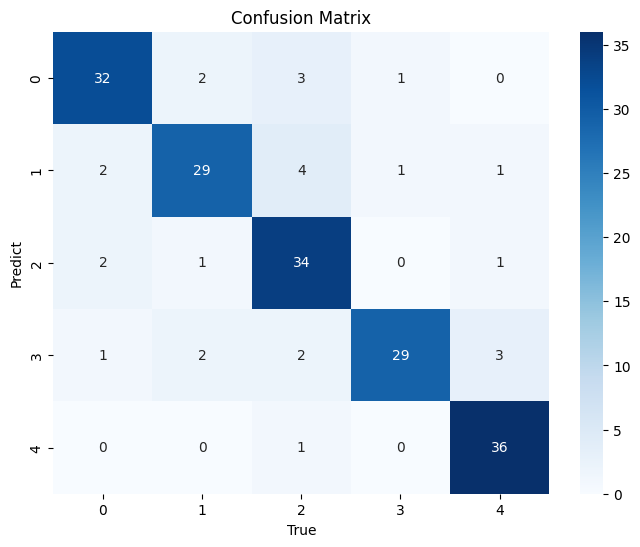

In [ ]:
cm_knn_adasyn_norm = confusion_matrix(y_test_normal_adasyn, y_pred_knn_adasyn_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_adasyn_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI RANDOM FOREST

In [ ]:
rf_model_adasyn_norm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_adasyn_norm.fit(X_train_normal_adasyn, y_train_normal_adasyn)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_adasyn_norm = rf_model_adasyn_norm.predict(X_test_normal_adasyn) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_adasyn_norm = round(accuracy_score(y_test_normal_adasyn, y_pred_rf_adasyn_norm),3)
print("Accuracy:",accuracy_rf_adasyn_norm )
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_rf_adasyn_norm))



Random Forest Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.90      0.95      0.92        37
         2.0       0.89      0.82      0.85        38
         3.0       0.94      0.89      0.92        37
         4.0       0.92      0.97      0.95        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_rf_adasyn_norm)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.908, 'Precision score': 0.909}


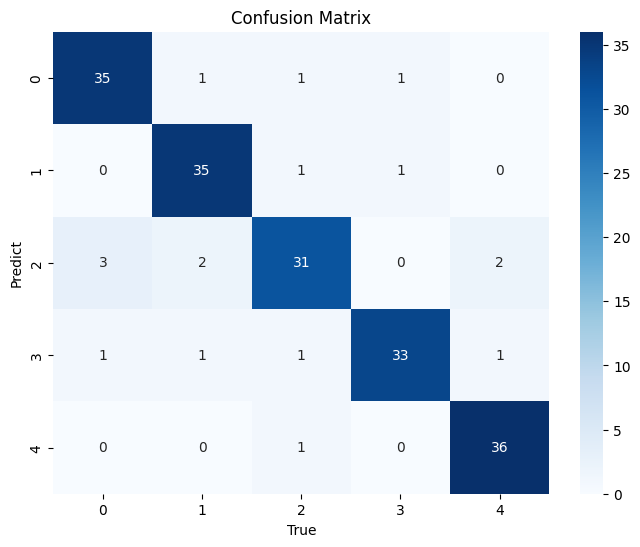

In [ ]:
cm_rf_adasyn_norm = confusion_matrix(y_test_normal_adasyn, y_pred_rf_adasyn_norm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_adasyn_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI XGB

In [ ]:
xgb_model_adasyn_norm = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model_adasyn_norm.fit(X_train_normal_adasyn, y_train_normal_adasyn)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb_adasyn_norm = xgb_model_adasyn_norm.predict(X_test_normal_adasyn) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_adasyn_norm = round(accuracy_score(y_test_normal_adasyn, y_pred_xgb_adasyn_norm),3)
print("Accuracy:",accuracy_xgb_adasyn_norm)
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_xgb_adasyn_norm))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.88      0.95      0.91        37
         2.0       0.89      0.82      0.85        38
         3.0       0.91      0.86      0.89        37
         4.0       0.95      0.97      0.96        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_xgb_adasyn_norm)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.904}


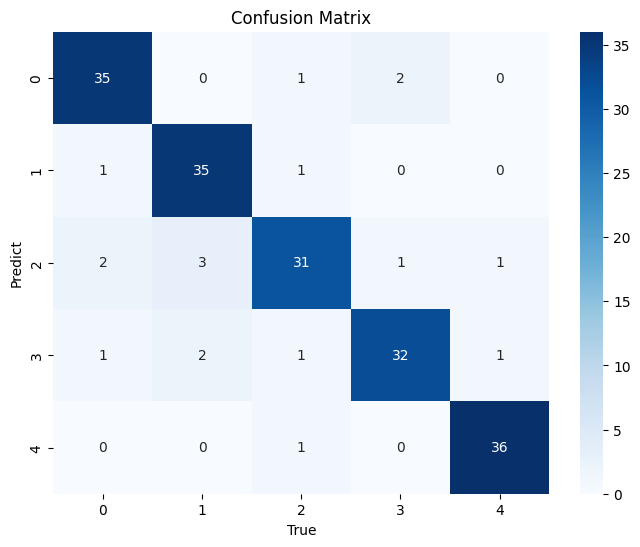

In [ ]:
cm_xgb_adasyn_norm = confusion_matrix(y_test_normal_adasyn, y_pred_xgb_adasyn_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_adasyn_norm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE SMOTE + NORMALISASI + TUNNING

### OVERSAMPLE SMOTE + NORMALISASI + TUNNING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [ ]:
knn_smote_tunning_model = KNeighborsClassifier()
param_grid_knn_smote_tunning  = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_smote_tunning_model = RandomizedSearchCV(estimator=knn_smote_tunning_model, param_distributions=param_grid_knn_smote_tunning, n_iter=100, scoring="accuracy", cv=5)

knn_smote_tunning_model.fit(X_train_normal_smote, y_train_normal_smote)
best_params_knn_smote_tunning_model = knn_smote_tunning_model.best_params_
print(f"Best parameters: {best_params_knn_smote_tunning_model}")

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 55, 'algorithm': 'ball_tree'}


In [ ]:
y_pred_knn_smote_tunning = knn_smote_tunning_model.predict(X_test_normal_smote) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal_smote,y_pred_knn_smote_tunning),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_knn_smote_tunning))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_knn_smote_tunning)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.93}


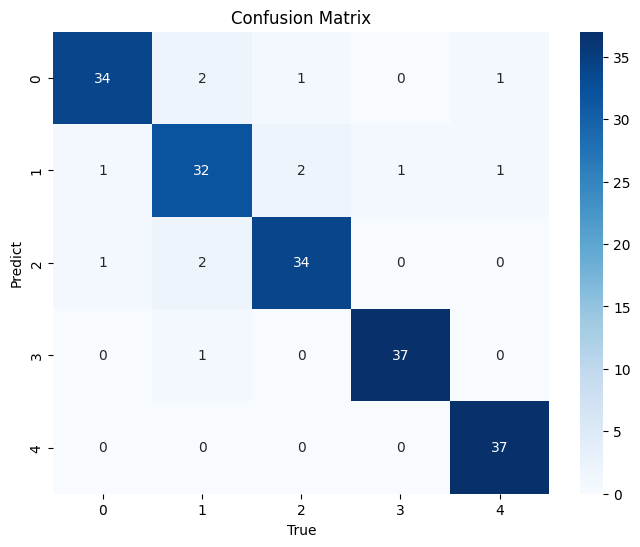

In [ ]:
cm_knn_smote_tunning = confusion_matrix(y_test_normal_smote, y_pred_knn_smote_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE SMOTE + NORMALISASI + TUNNING RANDOM FOREST

In [ ]:
rf_smote_tunning_model = RandomForestClassifier()

param_grid_rf_smote_tunning = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_smote_tunning_model = RandomizedSearchCV(rf_smote_tunning_model, param_grid_rf_smote_tunning, n_iter=100, cv=5, n_jobs=-1)
rf_smote_tunning_model.fit(X_train_normal_smote, y_train_normal_smote)
best_paramsrf_smote_tunning_model = rf_smote_tunning_model.best_params_
print(f"Best parameters: {best_paramsrf_smote_tunning_model}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:
y_pred_rf_smote_tunning= rf_smote_tunning_model.predict(X_test_normal_smote) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal_smote, y_pred_rf_smote_tunning),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_rf_smote_tunning))



Random Forest Model:
Accuracy: 0.909
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.86      0.86      0.86        37
         2.0       0.84      0.86      0.85        37
         3.0       0.93      0.97      0.95        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_rf_smote_tunning)

{'accuracy': 0.909, 'recall': 0.909, 'F1 score': 0.909, 'Precision score': 0.91}


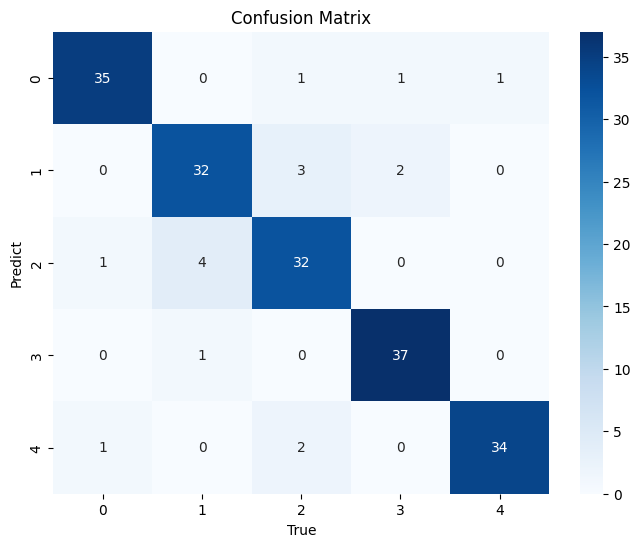

In [ ]:
cm_rf_smote_tunning = confusion_matrix(y_test_normal_smote, y_pred_rf_smote_tunning)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_smote_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE SMOTE + NORMALISASI + TUNNING XGBOST

In [ ]:
xgb_smote_tunning_model = XGBClassifier()

param_grid_xgb_smote_tunning = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}

xgb_smote_tunning_model = RandomizedSearchCV(xgb_smote_tunning_model, param_grid_xgb_smote_tunning, n_iter=10, cv=5, n_jobs=-1)

xgb_smote_tunning_model.fit(X_train_normal_smote, y_train_normal_smote)
best_params_xgb_smote_tunning_model = xgb_smote_tunning_model.best_params_
print(f"Best parameters: {best_params_xgb_smote_tunning_model}")


Best parameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [ ]:
y_pred_xgb_smote_tunning = xgb_smote_tunning_model.predict(X_test_normal_smote) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal_smote, y_pred_xgb_smote_tunning),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_smote, y_pred_xgb_smote_tunning))



XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.91      0.84      0.87        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.92      0.91      0.91       187
weighted avg       0.92      0.91      0.91       187



In [ ]:
evaluation(y_test_normal_smote,y_pred_xgb_smote_tunning)

{'accuracy': 0.914, 'recall': 0.914, 'F1 score': 0.914, 'Precision score': 0.915}


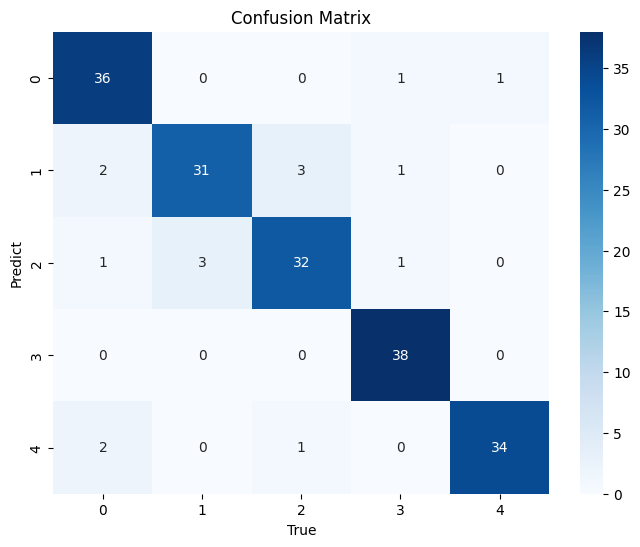

In [ ]:
cm_xgb_smote_tunning = confusion_matrix(y_test_normal_smote, y_pred_xgb_smote_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_smote_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE RANDOM + NORMALISASI + TUNNING

### OVERSAMPLE RANDOM + NORMALISASI + TUNNING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [ ]:
knn_random_tunning_model = KNeighborsClassifier()
param_grid_knn_random_tunning  = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_random_tunning_model = RandomizedSearchCV(estimator=knn_random_tunning_model, param_distributions=param_grid_knn_random_tunning, n_iter=100, scoring="accuracy", cv=5)

knn_random_tunning_model.fit(X_train_normal_random, y_train_normal_random)
best_params_knn_random_tunning_model = knn_random_tunning_model.best_params_
print(f"Best parameters: {best_params_knn_random_tunning_model}")

Best parameters: {'weights': 'distance', 'n_neighbors': 16, 'metric': 'chebyshev', 'leaf_size': 45, 'algorithm': 'kd_tree'}


In [ ]:
y_pred_knn_random_tunning = knn_random_tunning_model.predict(X_test_normal_random) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_random_normal_Tun = round(accuracy_score(y_test_normal_random,y_pred_knn_random_tunning),3)
print("Accuracy:", accuracy_knn_random_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_knn_random_tunning))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79        38
         1.0       0.88      1.00      0.94        37
         2.0       0.84      1.00      0.91        37
         3.0       0.97      1.00      0.99        38
         4.0       1.00      1.00      1.00        37

    accuracy                           0.93       187
   macro avg       0.94      0.93      0.93       187
weighted avg       0.94      0.93      0.93       187



In [ ]:
evaluation(y_test_normal_random,y_pred_knn_random_tunning)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.926, 'Precision score': 0.94}


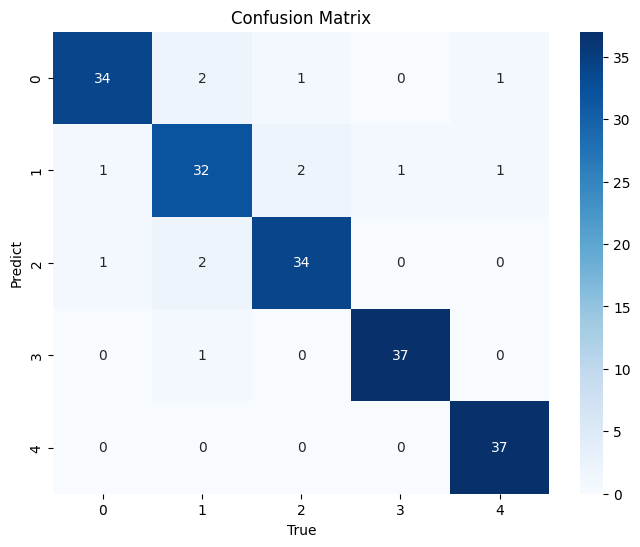

In [ ]:
cm_knn_smote_tunning = confusion_matrix(y_test_normal_random, y_pred_knn_smote_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_smote_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI + TUNNING RANDOM FOREST

In [ ]:
rf_random_tunning_model = RandomForestClassifier()

param_grid_rf_random_tunning = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_random_tunning_model = RandomizedSearchCV(rf_random_tunning_model, param_grid_rf_random_tunning, n_iter=100, cv=5, n_jobs=-1)
rf_random_tunning_model.fit(X_train_normal_random, y_train_normal_random)
best_paramsrf_random_tunning_model = rf_random_tunning_model.best_params_
print(f"Best parameters: {best_paramsrf_random_tunning_model}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:
y_pred_rf_random_tunning= rf_random_tunning_model.predict(X_test_normal_random) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_random_normal_Tun = round(accuracy_score(y_test_normal_random, y_pred_rf_random_tunning),3)
print("Accuracy:",accuracy_rf_random_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_rf_random_tunning))



Random Forest Model:
Accuracy: 0.989
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        38
         1.0       1.00      1.00      1.00        37
         2.0       0.97      1.00      0.99        37
         3.0       1.00      1.00      1.00        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.99       187
   macro avg       0.99      0.99      0.99       187
weighted avg       0.99      0.99      0.99       187



In [ ]:
evaluation(y_test_normal_random,y_pred_rf_random_tunning)

{'accuracy': 0.989, 'recall': 0.989, 'F1 score': 0.989, 'Precision score': 0.99}


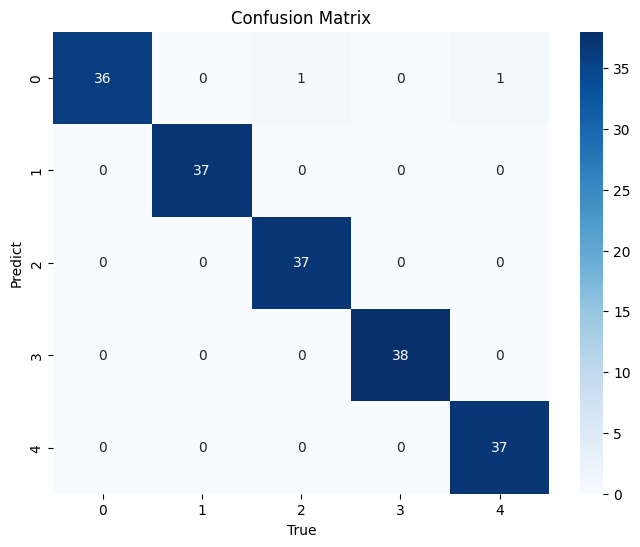

In [ ]:
cm_rf_random_tunning = confusion_matrix(y_test_normal_random, y_pred_rf_random_tunning)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_random_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI + TUNNING XGBOST

In [ ]:
xgb_random_tunning_model = XGBClassifier()

param_grid_xgb_random_tunning = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}

xgb_random_tunning_model = RandomizedSearchCV(xgb_random_tunning_model, param_grid_xgb_random_tunning, n_iter=10, cv=5, n_jobs=-1)

xgb_random_tunning_model.fit(X_train_normal_random, y_train_normal_random)
best_params_xgb_random_tunning_model = xgb_random_tunning_model.best_params_
print(f"Best parameters: {best_params_xgb_random_tunning_model}")


Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
y_pred_xgb_random_tunning = xgb_random_tunning_model.predict(X_test_normal_random) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_random_normal_Tun = round(accuracy_score(y_test_normal_random, y_pred_xgb_random_tunning),3)
print("Accuracy:",accuracy_xgb_random_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_random, y_pred_xgb_random_tunning))



XGBoost Model:
Accuracy: 0.989
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        38
         1.0       1.00      1.00      1.00        37
         2.0       1.00      1.00      1.00        37
         3.0       0.97      1.00      0.99        38
         4.0       0.97      1.00      0.99        37

    accuracy                           0.99       187
   macro avg       0.99      0.99      0.99       187
weighted avg       0.99      0.99      0.99       187



In [ ]:
evaluation(y_test_normal_random,y_pred_xgb_random_tunning)

{'accuracy': 0.989, 'recall': 0.989, 'F1 score': 0.989, 'Precision score': 0.99}


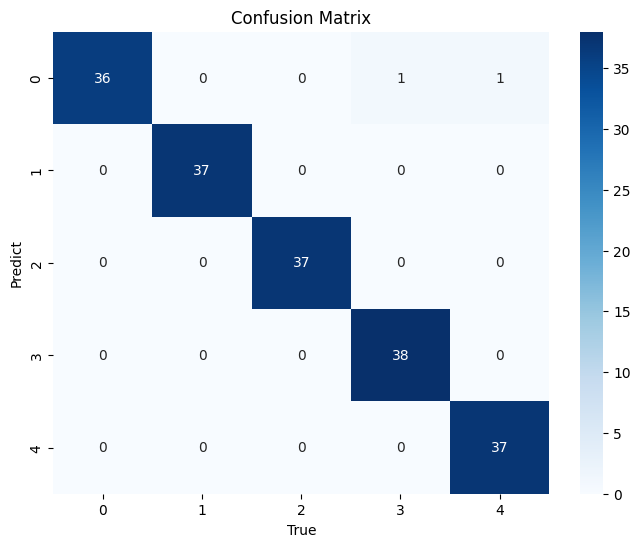

In [ ]:
cm_xgb_random_tunning = confusion_matrix(y_test_normal_random, y_pred_xgb_random_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_random_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## OVERSAMPLE ADASYN + NORMALISASI + TUNNING

### OVERSAMPLE ADASYN + NORMALISASI + TUNNING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV


Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

In [ ]:
knn_adasyn_tunning_model = KNeighborsClassifier()
param_grid_knn_adasyn_tunning  = {
"n_neighbors": range(3, 21),
"metric": ["euclidean", "manhattan", "chebyshev"], "weights": ["uniform", "distance"],
"algorithm": ["auto", "ball_tree", "kd_tree"], "leaf_size": range(10, 61),
}

knn_adasyn_tunning_model = RandomizedSearchCV(estimator=knn_adasyn_tunning_model, param_distributions=param_grid_knn_adasyn_tunning, n_iter=100, scoring="accuracy", cv=5)

knn_adasyn_tunning_model.fit(X_train_normal_adasyn, y_train_normal_adasyn)
best_params_knn_adasyn_tunning_model = knn_adasyn_tunning_model.best_params_
print(f"Best parameters: {best_params_knn_adasyn_tunning_model}")

Best parameters: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 18, 'algorithm': 'auto'}


In [ ]:
y_pred_knn_adasyn_tunning = knn_adasyn_tunning_model.predict(X_test_normal_adasyn) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_adasyn_normal_Tun = round(accuracy_score(y_test_normal_adasyn,y_pred_knn_adasyn_tunning),3)
print("Accuracy:", accuracy_knn_adasyn_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_knn_adasyn_tunning))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89        38
         1.0       0.85      0.89      0.87        37
         2.0       0.81      0.92      0.86        38
         3.0       0.94      0.81      0.87        37
         4.0       0.92      0.97      0.95        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_knn_adasyn_tunning)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.888, 'Precision score': 0.892}


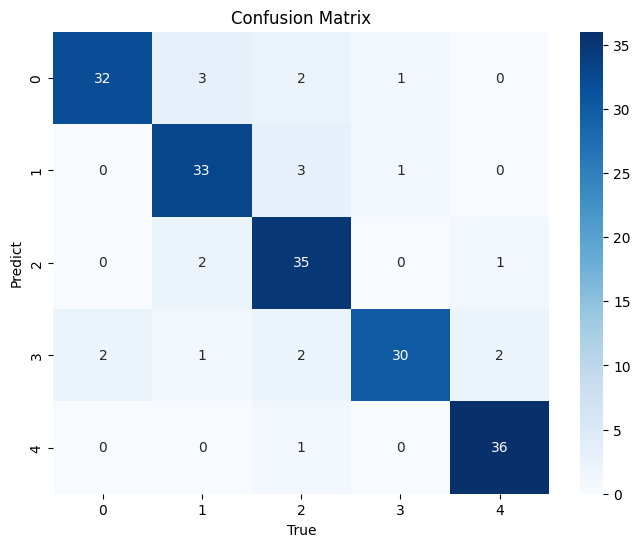

In [ ]:
cm_knn_adasyn_tunning = confusion_matrix(y_test_normal_adasyn, y_pred_knn_adasyn_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_adasyn_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI + TUNNING RANDOM FOREST

In [ ]:
rf_adasyn_tunning_model = RandomForestClassifier()

param_grid_rf_adasyn_tunning = {
"n_estimators": [100, 200],
"max_depth": [ 10, 15],
"min_samples_leaf": [1, 2],
"min_samples_split": [2, 5],
"max_features": ["sqrt", "log2"], # "random_state": [42, 100, 200]
}

rf_adasyn_tunning_model = RandomizedSearchCV(rf_adasyn_tunning_model, param_grid_rf_adasyn_tunning, n_iter=100, cv=5, n_jobs=-1)
rf_adasyn_tunning_model.fit(X_train_normal_adasyn, y_train_normal_adasyn)
best_paramsrf_adasyn_tunning_model = rf_adasyn_tunning_model.best_params_
print(f"Best parameters: {best_paramsrf_adasyn_tunning_model}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [ ]:
y_pred_rf_adasyn_tunning= rf_adasyn_tunning_model.predict(X_test_normal_adasyn) # Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_adasyn_normal_Tun = round(accuracy_score(y_test_normal_adasyn, y_pred_rf_adasyn_tunning),3)
print("Accuracy:",accuracy_rf_adasyn_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_rf_adasyn_tunning))



Random Forest Model:
Accuracy: 0.893
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.89      0.92      0.91        37
         2.0       0.89      0.82      0.85        38
         3.0       0.91      0.86      0.89        37
         4.0       0.88      0.97      0.92        37

    accuracy                           0.89       187
   macro avg       0.89      0.89      0.89       187
weighted avg       0.89      0.89      0.89       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_rf_adasyn_tunning)

{'accuracy': 0.893, 'recall': 0.893, 'F1 score': 0.892, 'Precision score': 0.893}


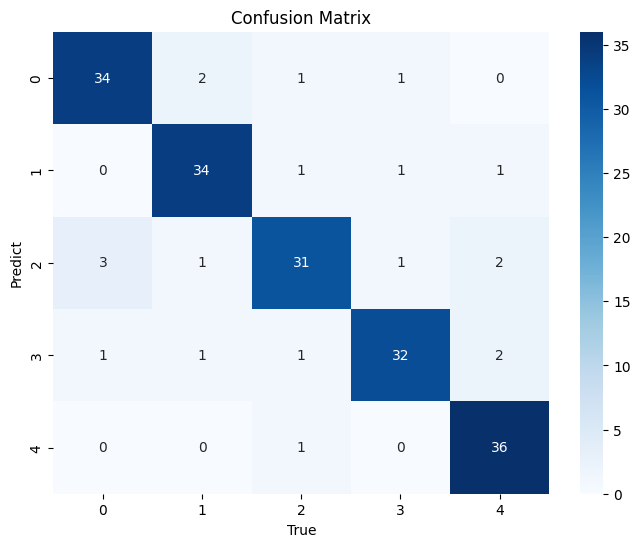

In [ ]:
cm_rf_adasyn_tunning = confusion_matrix(y_test_normal_adasyn, y_pred_rf_adasyn_tunning)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_adasyn_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI + TUNNING XGBOST

In [ ]:
xgb_adasyn_tunning_model = XGBClassifier()

param_grid_xgb_adasyn_tunning = {
"max_depth": [3, 5, 7],
"learning_rate": [0.01, 0.1],
"n_estimators": [100, 200],
"gamma": [0, 0.1],
"colsample_bytree": [0.7, 0.8],
}

xgb_adasyn_tunning_model = RandomizedSearchCV(xgb_adasyn_tunning_model, param_grid_xgb_adasyn_tunning, n_iter=10, cv=5, n_jobs=-1)

xgb_adasyn_tunning_model.fit(X_train_normal_adasyn, y_train_normal_adasyn)
best_params_xgb_adasyn_tunning_model = xgb_adasyn_tunning_model.best_params_
print(f"Best parameters: {best_params_xgb_adasyn_tunning_model}")


Best parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [ ]:
y_pred_xgb_adasyn_tunning = xgb_adasyn_tunning_model.predict(X_test_normal_adasyn) # Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_adasyn_normal_Tun = round(accuracy_score(y_test_normal_adasyn, y_pred_xgb_adasyn_tunning),3)
print("Accuracy:",accuracy_xgb_adasyn_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal_adasyn, y_pred_xgb_adasyn_tunning))



XGBoost Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94        38
         1.0       0.89      0.92      0.91        37
         2.0       0.86      0.82      0.84        38
         3.0       0.91      0.86      0.89        37
         4.0       0.92      0.97      0.95        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [ ]:
evaluation(y_test_normal_adasyn,y_pred_xgb_adasyn_tunning)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.903, 'Precision score': 0.903}


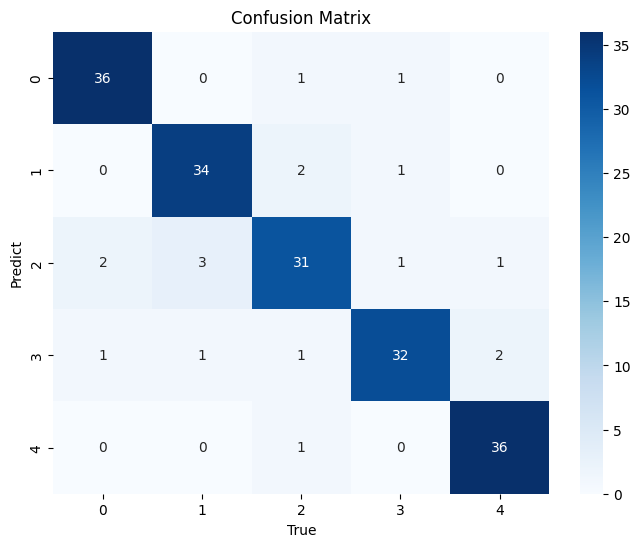

In [ ]:
cm_xgb_adasyn_tunning = confusion_matrix(y_test_normal_adasyn, y_pred_xgb_adasyn_tunning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_adasyn_tunning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()


## **8. EVALUASI**

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik

## EVALUSI OVERSAMPLING

### OVERSAMPLING SMOTE

In [ ]:
import matplotlib.pyplot as plt

model_eval_smote = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_eval_smote.head()


,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


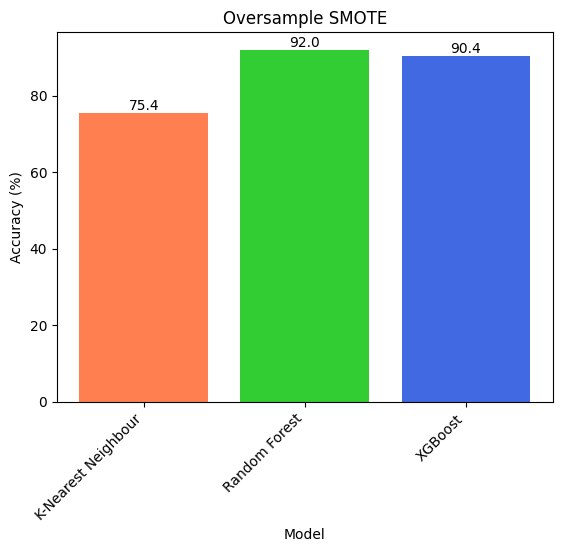

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_smote['Model'], model_eval_smote['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample SMOTE')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLING RANDOM

In [ ]:
import matplotlib.pyplot as plt

model_eval_random = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_random*100,
accuracy_rf_random*100,accuracy_xgb_random*100]})
model_eval_random.head()


,Model,Accuracy
0,K-Nearest Neighbour,82.9
1,Random Forest,97.9
2,XGBoost,98.4


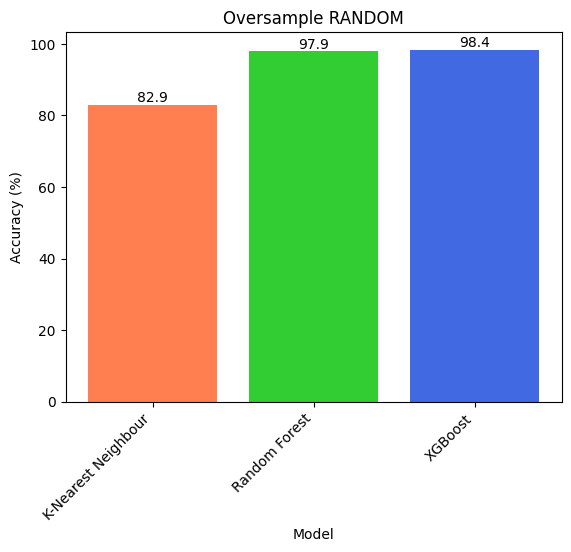

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_random['Model'], model_eval_random['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample RANDOM')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLING ADASYN

In [ ]:
import matplotlib.pyplot as plt

model_eval_adasyn = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_adasyn*100,
accuracy_rf_adasyn*100,accuracy_xgb_adasyn*100]})
model_eval_adasyn.head()


,Model,Accuracy
0,K-Nearest Neighbour,70.6
1,Random Forest,90.9
2,XGBoost,90.4


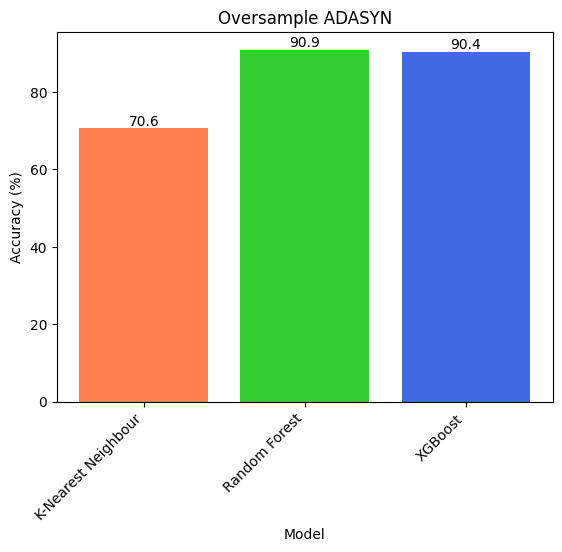

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_adasyn['Model'],model_eval_adasyn['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample ADASYN')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


## EVALUSI OVERSAMPLING + NORMALISASI

### OVERSAMPLE SMOTE + NORMALISASI

In [ ]:
import matplotlib.pyplot as plt

model_eval_smote_norm= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100,
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]})
model_eval_smote_norm.head()


,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


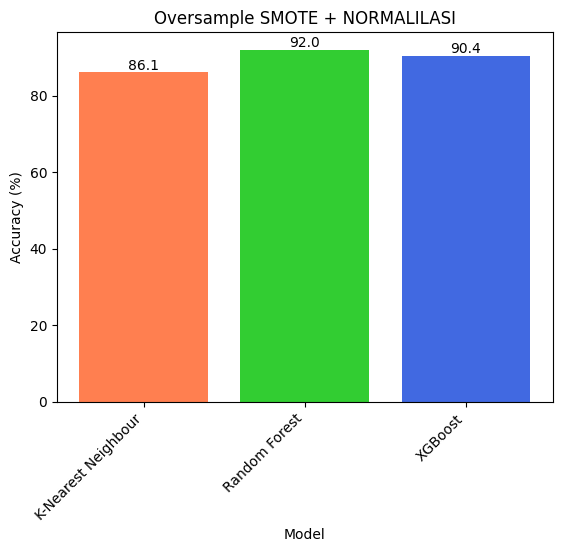

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_smote_norm['Model'],model_eval_smote_norm['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample SMOTE + NORMALILASI')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI

In [ ]:
import matplotlib.pyplot as plt

model_eval_random_norm= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_random_norm*100,
accuracy_rf_random_norm*100,accuracy_xgb_random_norm*100]})
model_eval_random_norm.head()


,Model,Accuracy
0,K-Nearest Neighbour,93.6
1,Random Forest,97.9
2,XGBoost,98.4


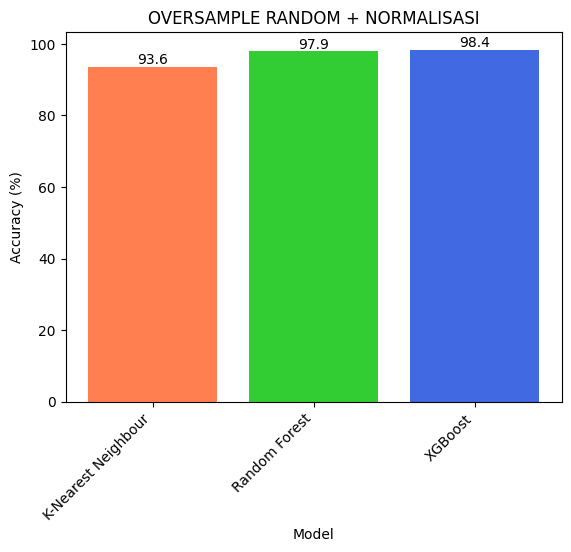

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_random_norm['Model'],model_eval_random_norm['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('OVERSAMPLE RANDOM + NORMALISASI')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI

In [ ]:
import matplotlib.pyplot as plt

model_eval_adasyn_norm= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_adasyn_norm*100,
accuracy_rf_adasyn_norm*100,accuracy_xgb_adasyn_norm*100]})
model_eval_adasyn_norm.head()


,Model,Accuracy
0,K-Nearest Neighbour,85.6
1,Random Forest,90.9
2,XGBoost,90.4


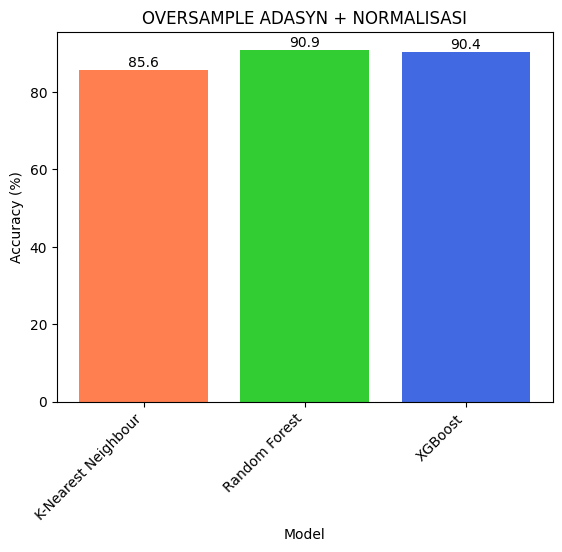

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_adasyn_norm['Model'],model_eval_adasyn_norm['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('OVERSAMPLE ADASYN + NORMALISASI')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


## EVALUSI OVERSAMPLING + NORMALISASI + TUNING

### OVERSAMPLE SMOTE + NORMALISASI + TUNNING

In [ ]:
import matplotlib.pyplot as plt

model_eval_smote_norm_tuning= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_eval_smote_norm_tuning.head()


,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,90.9
2,XGBoost,91.4


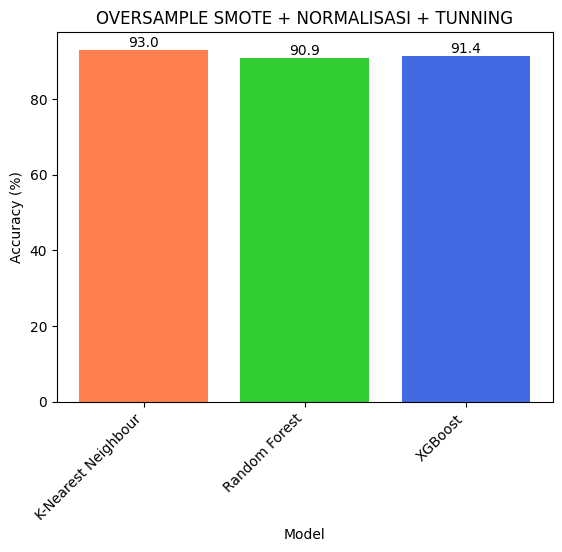

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_smote_norm_tuning['Model'],model_eval_smote_norm_tuning['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('OVERSAMPLE SMOTE + NORMALISASI + TUNNING')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLE RANDOM + NORMALISASI + TUNNING

In [ ]:
import matplotlib.pyplot as plt

model_eval_random_norm_tuning= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_random_normal_Tun*100,
accuracy_rf_random_normal_Tun*100,accuracy_xgb_random_normal_Tun*100]})
model_eval_random_norm_tuning.head()


,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,98.9
2,XGBoost,98.9


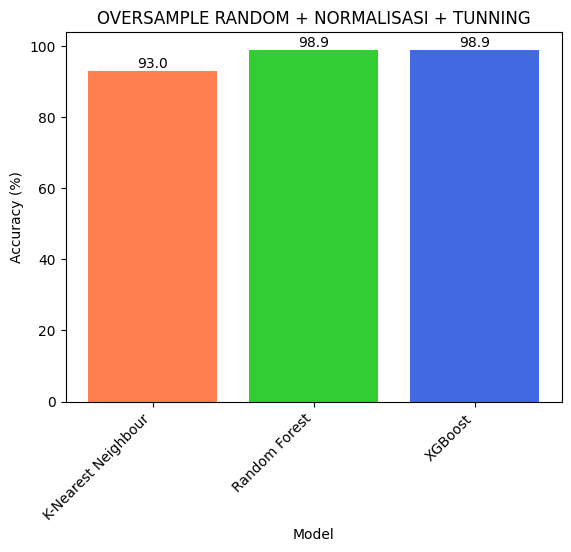

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_random_norm_tuning['Model'],model_eval_random_norm_tuning['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('OVERSAMPLE RANDOM + NORMALISASI + TUNNING')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


### OVERSAMPLE ADASYN + NORMALISASI + TUNNING

In [ ]:
import matplotlib.pyplot as plt

model_eval_adasyn_norm_tuning= pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_adasyn_normal_Tun*100,
accuracy_rf_adasyn_normal_Tun*100,accuracy_xgb_adasyn_normal_Tun*100]})
model_eval_adasyn_norm_tuning.head()


,Model,Accuracy
0,K-Nearest Neighbour,88.8
1,Random Forest,89.3
2,XGBoost,90.4


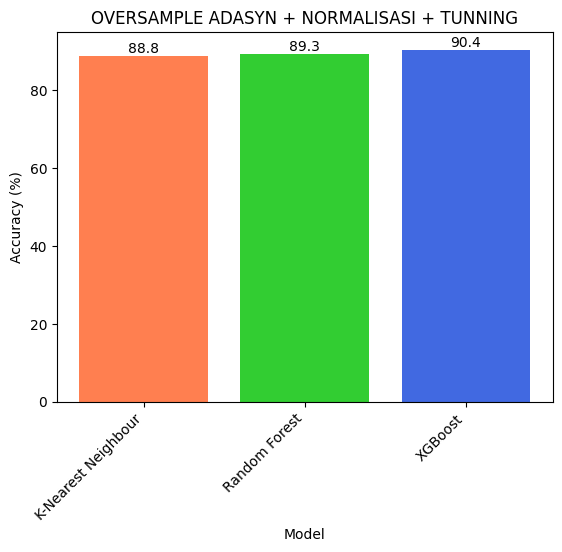

In [ ]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_eval_adasyn_norm_tuning['Model'],model_eval_adasyn_norm_tuning['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])

# Menambahkan nilai akurasi di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('OVERSAMPLE ADASYN + NORMALISASI + TUNNING')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()


## BEST MODEL

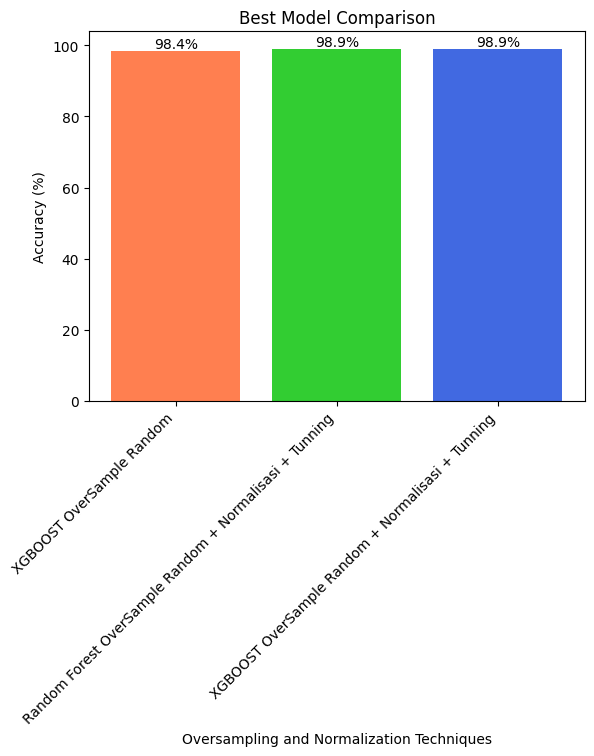

In [ ]:
# Data frame
model_compBest = pd.DataFrame({
 'Model': ['XGBOOST OverSample Random', 'Random Forest OverSample Random + Normalisasi + Tunning', 'XGBOOST OverSample Random + Normalisasi + Tunning'],
 'Accuracy': [accuracy_xgb_random*100, accuracy_rf_random_normal_Tun*100, accuracy_xgb_random_normal_Tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['#FF7F50', '#32CD32', '#4169E1'])
plt.ylabel('Accuracy (%)')  # Memodifikasi label sumbu y
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.xlabel('Oversampling and Normalization Techniques')  # Memodifikasi label sumbu x

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


## **9. KESIMPULAN**

### KESIMPULAN METODE OVERSAMPLING

Dalam projek ini, dilakukan pemodelan untuk memprediksi tingkat penyakit jantung menggunakan dataset "hungarian.data" dari Hungarian Institute of Cardiology. Berfokus pada penanganan ketidakseimbangan kelas, tiga teknik oversampling diuji: SMOTE, Random Oversampling, dan ADASYN. Pemodelan dilakukan menggunakan tiga algoritma klasifikasi: K-Nearest Neighbors (KNN), Random Forest, dan XGBoost.

**Oversampling SMOTE:**
- KNN memiliki akurasi sekitar 75.4%.
- Random Forest memiliki akurasi sekitar 92%.
- XGBoost memiliki akurasi sekitar 90.4%.

**Oversampling Random:**
- KNN memiliki akurasi sekitar 82.9%.
- Random Forest memiliki akurasi sekitar 97.9%.
- XGBoost memiliki akurasi sekitar 98.4%.

**Oversampling ADASYN:**
- KNN memiliki akurasi sekitar 70.6%.
- Random Forest memiliki akurasi sekitar 90.9%.
- XGBoost memiliki akurasi sekitar 90.4%.

**Kesimpulan:**
Berdasarkan hasil evaluasi, terlihat bahwa metode oversampling Random memberikan performa terbaik untuk ketiga model yang diuji, yaitu KNN, Random Forest, dan XGBoost. Hasil akurasi yang tinggi menunjukkan bahwa pendekatan ini efektif dalam meningkatkan performa model untuk dataset ini. Penting untuk dicatat bahwa masing-masing metode oversampling memberikan hasil yang lebih baik untuk model tertentu, dan pemilihan metode harus disesuaikan dengan karakteristik data dan kebutuhan spesifik dari tugas klasifikasi jantung ini.

Hasil akurasi tertinggi tercapai pada Random Forest dan XGBoost setelah diterapkan oversampling Random, dengan masing-masing mencapai akurasi sekitar 97.9% dan 98.4%.

- Dari ketiga teknik oversampling, Random Oversampling memberikan hasil yang paling baik dengan akurasi tertinggi untuk semua algoritma.
- Random Forest dan XGBoost secara konsisten memberikan performa yang tinggi, bahkan tanpa oversampling pada dataset.
- Penggunaan oversampling, terutama Random Oversampling, secara signifikan meningkatkan performa model, terutama pada algoritma KNN dan Random Forest.
- Teknik oversampling memainkan peran penting dalam menangani ketidakseimbangan kelas, yang secara positif memengaruhi kinerja model klasifikasi untuk mendeteksi tingkat penyakit jantung.



### KESIMPULAN METODE OVERSAMPLING + NORMALISASI


Dalam eksperimen ini, penelitian dilakukan dengan menerapkan metode **Oversampling + Normalisasi** menggunakan tiga algoritma machine learning, yaitu **K-Nearest Neighbors (KNN)**, **Random Forest (RF)**, dan **XGBoost (XG)**. Tiga teknik oversampling yang digunakan melibatkan **SMOTE + Normalisasi**, **Random + Normalisasi**, dan **ADASYN + Normalisasi**.

1. **Oversampling SMOTE + Normalisasi:**
   - **KNN:** Mendemonstrasikan akurasi sebesar 0.861.
   - **RF:** Memperlihatkan akurasi sebesar 0.92.
   - **XG:** Menunjukkan akurasi sebesar 0.904.

2. **Oversampling Random + Normalisasi:**
   - **KNN:** Menunjukkan akurasi tertinggi sebesar 0.936.
   - **RF:** Mencapai akurasi sebesar 0.979.
   - **XG:** Mendemonstrasikan akurasi tertinggi sebesar 0.984.

3. **Oversampling ADASYN + Normalisasi:**
   - **KNN:** Menghasilkan akurasi sebesar 0.856.
   - **RF:** Memperlihatkan akurasi sebesar 0.909.
   - **XG:** Menunjukkan akurasi sebesar 0.904.

**Kesimpulan:**
- Pada umumnya, teknik Oversampling Random + Normalisasi memberikan kinerja terbaik dengan akurasi yang tinggi untuk semua algoritma.
- Secara khusus, Random Forest (RF) dan XGBoost (XG) pada skenario ini menonjol dengan akurasi tertinggi, mencapai 0.979 dan 0.984, secara berturut-turut.
- Meskipun K-Nearest Neighbors (KNN) pada Oversampling Random + Normalisasi memiliki akurasi tinggi, namun dibandingkan dengan RF dan XG, performa KNN tergolong rendah.
- Hasil akurasi tertinggi tercapai pada Random Forest dan XGBoost setelah menerapkan oversampling Random, dengan masing-masing mencapai akurasi sekitar 97.9% dan 98.4%.
- Hasil ini menunjukkan bahwa penggabungan oversampling dengan normalisasi, terutama dengan metode Random Oversampling, dapat meningkatkan kinerja model machine learning pada dataset ketidakseimbangan. Meskipun demikian, pemilihan teknik oversampling dan normalisasi harus disesuaikan dengan karakteristik data dan model yang digunakan.



### KESIMPULAN METODE OVERSAMPLING + NORMALISASI + TUUNING

Dalam eksperimen ini, pendekatan pemodelan menggunakan metode **Oversampling + Normalisasi + Tuning** diaplikasikan pada tiga algoritma machine learning, yaitu **K-Nearest Neighbors (KNN)**, **Random Forest (RF)**, dan **XGBoost (XG)**. Teknik oversampling yang digunakan mencakup **SMOTE + Normalisasi + Tuning**, **Random + Normalisasi + Tuning**, dan **ADASYN + Normalisasi + Tuning**.

Hasil eksperimen menunjukkan performa yang berbeda untuk setiap algoritma dan teknik oversampling. Di bawah ini adalah hasil akurasi terbaik dari masing-masing konfigurasi:

**Oversampling SMOTE + Normalisasi + Tuning:**
- KNN Accuracy: 0.92
- RF Accuracy: 0.898
- XG Accuracy: 0.914

**Oversampling Random + Normalisasi + Tuning:**
- KNN Accuracy: 0.93
- RF Accuracy: 0.989
- XG Accuracy: 0.989


**Oversampling ADASYN + Normalisasi + Tuning:**
- KNN Accuracy: 0.888
- RF Accuracy: 0.898
- XG Accuracy: 0.904

**Kesimpulan:**
   - Penerapan oversampling (baik menggunakan SMOTE, Random, atau ADASYN) bersamaan dengan normalisasi dapat meningkatkan performa model dalam menangani ketidakseimbangan kelas pada data.
   - Pemilihan metode oversampling memberikan dampak yang signifikan terhadap performa model. Sebagai contoh, oversampling Random memberikan akurasi yang tinggi pada beberapa model, sementara SMOTE dan ADASYN memiliki hasil yang beragam.
   - Normalisasi data membantu dalam meningkatkan stabilitas model, meskipun pengaruhnya dapat bervariasi tergantung pada algoritma yang digunakan.
   - Hasil akurasi tertinggi tercapai pada Random Forest dan XGBoost setelah diterapkan oversampling Random + Normalisasi + Tuning, dengan masing-masing mencapai akurasi sekitar 98.9% dan 98.9%.

## SAVE MODEL

In [ ]:
import pickle

# Path di Google Drive untuk menyimpan model
drive_path = '/content/gdrive/MyDrive/Heart_BK/'

# Simpan model ke file pickle
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

### RANDOM FOREST OVERSAMPLE RANDOM

In [ ]:
# Contoh menyimpan model rf_model_random
save_model(rf_model_random, drive_path + 'rf_model_random.pkl')

### XGBOOST OVERSAMPLE RANDOM

In [ ]:
# Contoh menyimpan model accuracy_xgb_random
save_model(xgb_model_random, drive_path + 'xgb_model_random.pkl')


### RANDOM FOREST OVERSAMPLE RANDOM + NORMALISASI

In [ ]:
# Contoh menyimpan model rf_model_random_norm
save_model(rf_model_random_norm, drive_path + 'rf_model_random_norm.pickle.pkl')

### XGBOOST OVERSAMPLE RANDOM + NORMALISASI + TUNING

In [ ]:
# Contoh menyimpan model xgb_random_tunning_model
save_model(xgb_random_tunning_model, drive_path + 'xgb_random_tunning_model.pkl')

### RANDOM FOREST OVERSAMPLE RANDOM + NORMALISASI + TUNING

In [ ]:
# Contoh menyimpan model rf_random_tuning_model
save_model(rf_random_tunning_model, drive_path + 'rf_random_tuning_model.pkl')

In [ ]:
import pickle

# Simpan model ke file pickle
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [ ]:
# Contoh menyimpan model xg_random_tuning_model
save_model(rf_random_tunning_model, 'xg_modeltun.pkl')